## Build MRCNN Model -Load MRCNN and FCN weights - Load Training Files  

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import copy    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib          import cm
import mrcnn.utils       as utils
import mrcnn.visualize   as visualize
import mrcnn.visualize  as vis
import mrcnn.visualize_2 as vis2
from mrcnn.prep_notebook import build_fcn_inference_pipeline_newshapes, build_fcn_evaluate_pipeline_newshapes
from mrcnn.prep_notebook import get_inference_batch, get_evaluate_batch, get_image_batch
from mrcnn.prep_notebook import run_mrcnn_detection, run_fcn_detection, run_fcn_evaluation
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.visualize     import display_training_batch
# from mrcnn.utils         import trim_zeros, compute_overlaps
# from mrcnn.calculate_map import update_map_dictionaries

# WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_2298.h5' 
# FCN_WEIGHT_FILE = 'F:\\models_newshapes\\train_fcn8_l2_newshapes\\fcn20181224T0000\\fcn_0821.h5'
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --dataset        newshapes2 "
input_parms +=" --mrcnn_logs_dir train_mrcnn "
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE1 " 
input_parms +=" --mrcnn_model    /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/"+ "mrcnn_0020.h5 "
input_parms +=" --fcn_model      /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/" + "fcn_0089.h5"
input_parms +=" --fcn_arch       fcn8l2 " 
input_parms +=" --sysout         screen "
input_parms +=" --evaluate_method 3"
input_parms +=" --scale_factor    1"
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)

CLASS_COLUMN        = 4
ORIG_SCORE_COLUMN   = 5
DT_TYPE_COLUMN      = 6
SEQUENCE_COLUMN     = 7
NORM_SCORE_COLUMN   = 8    
SCORE_0_SUM_COLUMN  = 9
SCORE_0_AREA_COLUMN = 10
SCORE_0_COLUMN      = 11
SCORE_1_SUM_COLUMN  = 12
SCORE_1_AREA_COLUMN = 13
SCORE_1_COLUMN      = 14 
SCORE_1_NORM_COLUMN = 17
SCORE_2_SUM_COLUMN  = 18
SCORE_2_AREA_COLUMN = 19
SCORE_2_COLUMN      = 20
SCORE_2_NORM_COLUMN = 23

Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path


Using TensorFlow backend.


 Init Image Class - Possible Object Choices:  {'airplane': 3, 'tree': 5, 'truck': 3, 'sun': 1, 'cloud': 3, 'person': 5, 'building': 3, 'car': 3}
 Init Image Class - Custom Color Keys      :  ['ground', 'tree', 'sky', 'sun', 'cloud', 'person']
 Init Image Class - Object Priority List   :  ['building', 'tree', 'car']
 Init Image Class - BUILD_MAX_TRIES        :  7
 Init Image Class - PERSON_CAR_DISTANCE    :  10

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                3
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['fcn32+']
   fcn_logs_dir                   train_fcn8L2_BCE1
   fcn_losses                     fcn_BCE_loss
   fcn_model                      /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn201

### 2019-05-13 : We are running in evaluation mode. Here is why:

We run in evaluation mode to bypass the MRCNN detection on objects. When in eval mode, the detection is constructed based on what GT we have passed to the 
detector. In evaluation_mode 3, we assign 0.5 as the score. In other words, the detector is unable to make a confident decision on the object.

In [2]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline_newshapes(args = args)
# mrcnn_model, fcn_model = build_fcn_evaluate_pipeline_newshapes(args = args)

MODE IS: inference

--> Execution started at: 05-20-2019 @ 17:59:53
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
    Build_mrcnn_inference_pipeline_newshapes MODE is : inference

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                3
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['fcn32+']
   fcn_logs_dir                   train_fcn8L2_BCE1
   fcn_losses                     fcn_BCE_loss
   fcn_model                      /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0089.h5
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir             

    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5 
MRCNN  MODEL Load weight file COMPLETE 
>>> Initialize Paths
 Linx  Linux
>>> Initialize ModelBase model 
   Mode      :  inference
   Model dir :  /home/kbardool/models_newshapes2/train_fcn8L2_BCE1
>>> ModelBase initialiation complete
>>> Initialize FCN model, mode:  inference architecture:  FCN8L2
    arch set to FCN8 - with L2 Regularization
<function fcn8_l2_graph at 0x7fcfe987eb70>


---------------------------------------------------
 Build FCN Model -  Arch:  FCN8L2  mode:  inference
---------------------------------------------------

------------------------------------------------------
>>> FCN8L2 Layer With Regularization - mode: inference
------------------------------------------------------

 
---------------------------------------------
>>> FCN Scoring Graph  - mode: inference
---------------------------------------------

 
-------------------------------------------

## Load MRCNN  and FCN Weights

In [3]:
# MRCNN_DIR_WEIGHTS =  'F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000'
MRCNN_DIR_WEIGHTS = '/home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000'
# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
mrcnn_files   = ['mrcnn_0001.h5', 'mrcnn_0020.h5', 'mrcnn_0041.h5', 'mrcnn_0060.h5',
                 'mrcnn_0092.h5', 'mrcnn_0116.h5', 'mrcnn_0154.h5', 'mrcnn_0174.h5',
                 'mrcnn_0201.h5', 'mrcnn_0223.h5', 'mrcnn_0243.h5', 'mrcnn_0332.h5']

In [4]:
FILE_IDX = 1
mrcnn_weights_file = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[FILE_IDX])
print("Loading weights ", mrcnn_weights_file)
mrcnn_model.load_model_weights(mrcnn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5 
MRCNN  MODEL Load weight file COMPLETE 


In [5]:
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000'

fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
              'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
              'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
              'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
              'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
              'fcn_0077.h5', 'fcn_0089.h5', 'fcn_0170.h5', 'fcn_0177.h5',
              'fcn_0253.h5', 'fcn_0266.h5']  ## 22,23,24,25


# fcn_files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#              'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#              'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#              'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#               'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

In [6]:
FILE_IDX = -1
fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", fcn_weights_file)
fcn_model.load_model_weights(fcn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 
FCN  MODEL Load weight file COMPLETE 


## Load test dataset

In [7]:
# del dataset_train, dataset_val, train_generator, val_generator
# dataset_test , test_generator   = prep_newshape_dataset( mrcnn_model.config,  1000, generator=True)
# with open('newshapes_dataset_1000_B.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
## -- OR --

# with open(os.path.join(mrcnn_model.config.DIR_DATASET,"newshapes2_test_dataset_1000_A.pkl"), 'rb') as infile:

with open(os.path.join("/home/kbardool/MLDatasets/newshapes2","newshapes2_test_dataset_1000_A.pkl"), 'rb') as infile:
    dataset_test = pickle.load(infile)
print(type(dataset_test))    

dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

<class 'mrcnn.newshapes2.NewImagesDataset'>
 Active Class Information 
--------------------------
[1, 2, 3, 4, 5, 6, 7, 8]
internal_class:  1 ext_cls: 1 category-name: None - person
internal_class:  2 ext_cls: 2 category-name: None - car
internal_class:  3 ext_cls: 3 category-name: None - sun
internal_class:  4 ext_cls: 4 category-name: None - building
internal_class:  5 ext_cls: 5 category-name: None - tree
internal_class:  6 ext_cls: 6 category-name: None - cloud
internal_class:  7 ext_cls: 7 category-name: None - airplane
internal_class:  8 ext_cls: 8 category-name: None - truck
Testing Dataset Image Count: 1000
Testing Dataset Class Count: 9
1000


###  Display some images from dataset

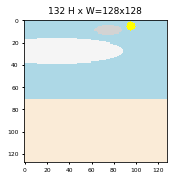

In [20]:
# image_list = list(range(160,200))
image_list = list(range(132, 132))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

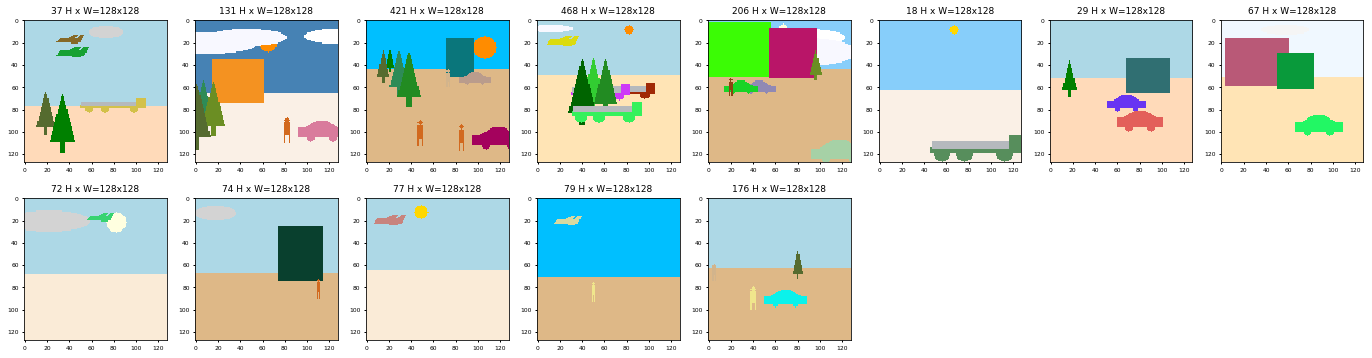

In [9]:
# image_list = list(range(160,200))
# image_list = list(range(0, 80))
image_list = [37, 131, 421, 468, 206 , 18, 29, 67, 72, 74, 77, 79, 176]
image_titles = [str(i) for i in image_list]

images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

####  Display next image from generator

In [ ]:
# train_batch_x, train_batch_y = next(test_generator)
# visualize.display_training_batch(dataset_test, train_batch_x)

## Evaluate indiviual image


GT_BOXES for image  468
--------------------------------------------------------------------------------
        class             |                              
seq  id name              |  Y1  X1  Y2  X2     CX     CY    AREA
--------------------------------------------------------------------------------
  0  3 sun                |   5  78  14  87    82.5    9.5    81.00
  1  6 cloud              |   5   0  12  32    16.0    8.5   224.00
  2  7 airplane           |  15   9  24  38    23.5   19.5   261.00
  3  8 truck              |  57  68  72 106    87.0   64.5   570.00
  4  8 truck              |  58  30  73  83    56.5   65.5   795.00
  5  5 tree               |  35  45  78  56    50.5   56.5   473.00
  6  5 tree               |  36  51  78  72    61.5   57.0   882.00
  7  5 tree               |  36  28  95  51    39.5   65.5  1357.00
  8  8 truck              |  74  31  93  94    62.5   83.5  1197.00



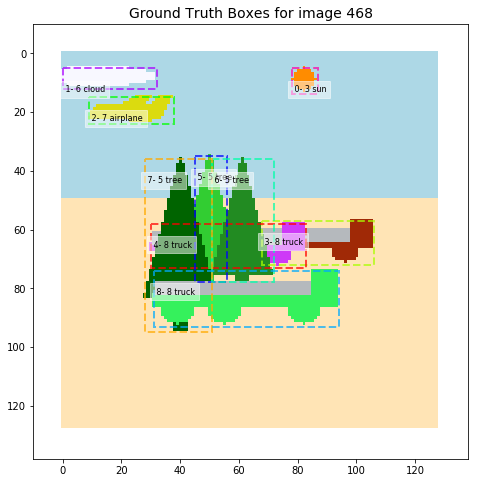

In [62]:
image_id = 468
cols = 8
classes = [1,2,3,4,5,6,7,8]
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)
vis2.display_gt_bboxes(dataset_test, dataset_test.config, image_id, size=8, verbose = True)

# r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

In [63]:
vis2.display_pr_fcn_scores(r[0], class_names)



PR_SCORES from fcn/mrcnn_results:   (top line MRCNN, bottom line FCN) 
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              |   |                |     MRCNN / FCN score 0    |         MRCNN / FCN score 1        |        MRCNN / FCN score 2         | 
          class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   | 
    seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  Y1  X1  Y2  X2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  64  6 cloud              | 1 | 0.9997  1.0000 |   0.9499   232.0    0.9499 

PR_SCORES from fcn/mrcnn_results:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              |   |                |        MRCNN score 0       |          MRCNN score 1             |           MRCNN score 2            |                         
          class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   |                         
    seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  X1  Y1  X2  Y2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 10  54  2 car                | 1 | 0.4836  1.0000 |   0.9843   396.0  

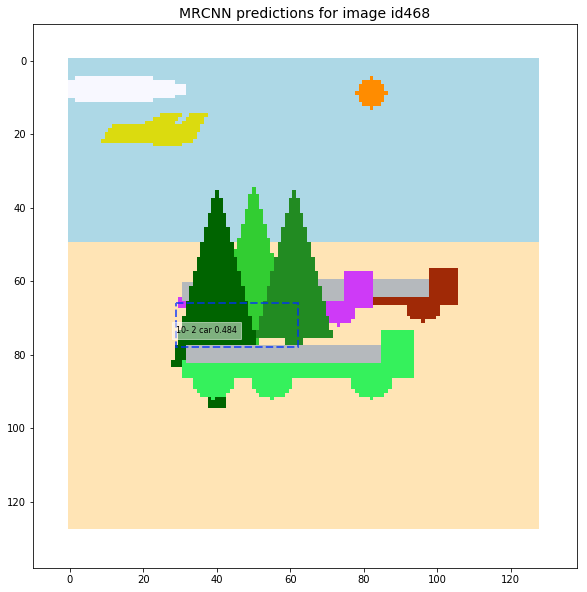

In [65]:
only = None
only = [2]
vis2.display_pr_scores(r[0], class_names, display = True, size = 10,  only = only)
# vis2.display_pr_hm_scores(r[0], class_names, only = None)
# vis2.display_pr_hm_scores_box_info(r[0], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names, only = only)

In [50]:
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_fcn_scores_box_info2(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)

  FCN BBox Information - classes   --  :  [3, 7]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                         |                                                 |    (COVAR)    |               CLIP REGION   
BOX     class                                            |                   Width   Height                |      SQRT     |      FROM/TO               FROM/TO 
seq  id     name              Y1/X1              Y2/X2   |    CX / CY         (W)  ~  (H)      AREA        |  W/2     H/2  |  X1/Y1    X2/Y2   A |  X1/Y1   X2/Y2   A
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 57   3 sun             ( 20.00, 56.00)  ( 32.00, 74.00) |  65.00/ 26.00    18.00~  12.00   216.00   30.00 |   3.00   

In [ ]:
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)

##  Manipulate some images to test contextual relationships

|Exp |Image     | Original Image | modifications |Conxtextual experiment
|----| :------- |:-------------- | :-------------|:------------------------------------------------------------------ 
| 1 | Image 18 | sun and truck | Remove sun, add building |  move truck around with and without a building present in the image
| 2 | image 67 | Buildings and car|                    | If we move a person around the activation "should" peak when it's in proper position with regards to the car.
| 3 | image 67 | Buildings and car| Remove all objects | and move an object of each class around in black, and in color. 
| 4 | Image 72 | sun and airplane | Remove sun         | move a car around the image, and move a truck around the image , comparing the results. Moving a truck should invoke higher activation than a car, since the cars do not cooccur with an airplane
| 5 | Image 77 | Sun, Airplane    | Remove sun         | move airplane around with and and without a building present in the scene. The activation strength should increase when the building is absent
| 6 | Image 79 | Person, plane | Remove the plane | move a car around the image. Activation of the car should peak when it's in propoer position with regards to the person
| 7 | image 176| 2 persons, tree, car| Remove tree and persons | move a airplane around (car and airplane dont occur in same image - so the relatvie activation strength of the airplane, in proper position, should be higher when thecar is absent from the image
    
    - The max FCN activation of the person is close to the car
 

####  Objects to add / remove from image s

In [ ]:
## image 77: [('sun', (255.0, 215.0, 0.0), (49, 13, 6, 6)), ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))]
## image 27 : [ ('sun', (255.0, 255.0, 224.0), (87, 16, 7, 7)),   ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20)),   ('person', (210.0, 105.0, 30.0), (124, 107, 2, 11))]

# del dataset_test.image_info[image_id]['shapes'][0:2]
# black_car  = ('car', black, (cx, cy, 15, 7))
# black_car = ('car', (0.0, 0.0, 0.0),(64,64, 15, 7))
# person = ('person', (139.0, 69.0, 19.0), (17, 92, 2, 10))
## person = ('person', (240.0, 230.0, 140.0), (40, 92, 2, 10))
## black_sun = ('sun', (0.0, 0.0, 0.0), (7, 9, 4, 4))
building  =  ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20))
airplane  = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))
car       = ('car', (150.0, 174.0, 8.0), (87, 112, 22, 11))
truck     = ('truck', (213.0, 56.0, 119.0), (80, 93, 39, 13))
truck     = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))
tree      = ('tree', (50.0, 205.0, 50.0), (100, 91, 12, 28))
cloud     = ('cloud', (192.0, 192.0, 192.0), (106, 20, 34, 8))
sun       = ('sun', (255.0, 140.0, 0.0), (66, 18, 7, 7)),

In [ ]:
# pp.pprint(dataset_test.image_info[20]['shapes'])
pp.pprint(dataset_test.image_info[76]['shapes'])

#### Image 18

In [ ]:
image_id = 18
save_shapes = copy.copy(dataset_test.image_info[image_id]['shapes'])
pp.pprint(save_shapes)

In [ ]:
# pp.pprint(save_shapes)
# dataset_test.image_info[image_id]['shapes'] = save_shapes
pp.pprint(dataset_test.image_info[image_id]['shapes'])


# del dataset_test.image_info[image_id]['shapes'][0:2]
# new_obj  = ('car', black, (64,64, 15, 7))
# person = ('person', (139.0, 69.0, 19.0), (17, 92, 2, 10))
## person = ('person', (240.0, 230.0, 140.0), (40, 92, 2, 10))

new_obj = ('sun', (0.0, 0.0, 0.0), (7, 9, 4, 4))
dataset_test.image_info[image_id]['shapes'].append(new_obj)

pp.pprint(dataset_test.image_info[image_id]['shapes'])

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
del dataset_test.image_info[image_id]['shapes'][0]

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
# new_obj  = ('car', black, (cx, cy, 15, 7))
new_obj = ('sun', (0.0, 0.0, 0.0), (67, 9, 4, 4))
dataset_test.image_info[image_id]['shapes'].append(new_obj)

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

In [ ]:
dataset_test.image_info[image_id]['shapes'] = save_shapes
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

#### Manipulate image 67

In [ ]:
image_id = 67
# save_shapes = copy.copy(dataset_test.image_info[image_id]['shapes'])
pp.pprint(save_shapes)

In [ ]:
# pp.pprint(save_shapes)
# dataset_test.image_info[image_id]['shapes'] = save_shapes
# del dataset_test.image_info[image_id]['shapes'][0:2]
# new_obj  = ('car', black, (64,64, 15, 7))
# person = ('person', (139.0, 69.0, 19.0), (17, 92, 2, 10))
## person = ('person', (240.0, 230.0, 140.0), (40, 92, 2, 10))
dataset_test.image_info[image_id]['shapes'].append(('airplane', (215.0, 217.0, 161.0), (31, 23, 16, 6)))


pp.pprint(dataset_test.image_info[image_id]['shapes'])

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
del dataset_test.image_info[image_id]['shapes'][:4]
# new_obj = ('sun', (0.0, 0.0, 0.0), (7, 9, 4, 4))
new_obj = ('building', (0.0, 0.0, 0.0), (4, 4, 16, 16))
dataset_test.image_info[image_id]['shapes'].append(new_obj)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
# new_obj  = ('car', black, (cx, cy, 15, 7))
new_obj = ('sun', (0.0, 0.0, 0.0), (67, 9, 4, 4))
dataset_test.image_info[image_id]['shapes'].append(new_obj)

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

In [ ]:
dataset_test.image_info[image_id]['shapes'] = save_shapes
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

#### Manipulate image 79

In [ ]:
image_id = 79
save_shapes = copy.copy(dataset_test.image_info[image_id]['shapes'])
pp.pprint(save_shapes)

In [ ]:
# new_obj  = ('car', black, (64,64, 15, 7))
# person = ('person', (139.0, 69.0, 19.0), (17, 92, 2, 10))
## person = ('person', (240.0, 230.0, 140.0), (40, 92, 2, 10))

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
del dataset_test.image_info[image_id]['shapes'][0]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
new_obj  = ('car', black, (cx, cy, 15, 7))
dataset_test.image_info[image_id]['shapes'].append(new_obj)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

In [ ]:
dataset_test.image_info[image_id]['shapes'] = save_shapes
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

## Image 77

#### Manipulate image 77

In [ ]:
image_id = 77
save_shapes_77 = copy.copy(dataset_test.image_info[image_id]['shapes'])
pp.pprint(save_shapes_77)

In [ ]:
# pp.pprint(save_shapes)
# dataset_test.image_info[image_id]['shapes'] = save_shapes
# building  =  ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20))
pp.pprint(dataset_test.image_info[image_id]['shapes'])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)


In [ ]:
airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))
car       = ('car', (150.0, 174.0, 8.0), (30, 93, 26, 12))
truck     = ('truck', (213.0, 56.0, 119.0), (30, 93, 26, 13))
small_car = ('car', (150.0, 174.0, 8.0), (100, 93, 20, 10))
car       = ('car', (150.0, 174.0, 8.0), (95, 93, 28, 13))

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(airplane)
dataset_test.image_info[image_id]['shapes'].append(small_car)
pp.pprint(dataset_test.image_info[image_id]['shapes'])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

# del dataset_test.image_info[image_id]['shapes'][-1]
# dataset_test.image_info[image_id]['shapes'].append(truck)
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

# dataset_test.image_info[image_id]['shapes'][-1] = car
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)


####  image 77 objects

In [ ]:
# del dataset_test.image_info[image_id]['shapes'][-1]
# dataset_test.image_info[image_id]['shapes'].append(building)
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))
person    = ('person', (139.0, 69.0, 19.0), (17, 92, 2, 10))
car       = ('car', (150.0, 174.0, 8.0), (87, 93, 24, 12))
sun       = ('sun', (255.0, 215.0, 0.0), (49, 13, 6, 6))
building  = ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20))
tree      = ('tree', (50.0, 205.0, 50.0), (100, 91, 12, 28))
cloud     = ('cloud', (192.0, 192.0, 192.0), (106, 20, 34, 8))
truck     = ('truck', (213.0, 56.0, 119.0), (80, 93, 39, 13))
truck     = ('truck', (213.0, 56.0, 119.0), (80, 93, 30, 13))
truck     = ('truck', (213.0, 56.0, 119.0), (30, 93, 26, 13))

car       = ('car', (150.0, 174.0, 8.0), (87, 93, 26, 12))
## smae place on the left of the image to avoid the building
car       = ('car', (150.0, 174.0, 8.0), (30, 93, 26, 12))

xsmall_car = ('car', (150.0, 174.0, 8.0),(95, 93, 15, 7)) 
small_car = ('car', (150.0, 174.0, 8.0), (95, 93, 20, 9))
large_car = ('car', (150.0, 174.0, 8.0), (95, 93, 26, 12))

xsmall_truck = ('truck', (150.0, 174.0, 8.0),(95, 93, 15, 7)) 
xsmall_sun   = ('sun', (150.0, 174.0, 8.0),(100, 93, 7, 7)) 
xsmall_building = ('building', (150.0, 174.0, 8.0),(100, 93, 7, 7)) 
cols = 9
only = None

####  Airplane and extra small car

#####  Airplane and extra small car (eval mode)

In [ ]:
# r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  


In [ ]:
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_fcn_scores(r[0]['fcn_scores'], class_names, only = only)
vis2.display_pr_fcn_style1(r[0], class_names)


#####  Airplane and extra small car

In [ ]:
dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(airplane)
dataset_test.image_info[image_id]['shapes'].append(xsmall_car)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

In [ ]:
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = 4, size = 4, classes = [1,2,3,4,5,6,7,8])
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names)
vis2.display_fcn_scores(r[0]['fcn_scores'], class_names, only = only)
vis2.display_pr_fcn_style1(r[0], class_names)


#####  Airplane and extra small truck instead of xsmall car

In [ ]:
dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(airplane)
# dataset_test.image_info[image_id]['shapes'].append(xsmall_sun)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_input(vis2.normalize_all(r[0]['pr_hm']), class_names, columns = 8, size = 4, classes = [1,2,3,4,5,6,7,8])
# vis2.display_fcn_output(r[0]['fcn_hm'], class_names, columns = 8, size = 4, classes = [1,2,3,4,5,6,7,8])
vis2.display_fcn_output(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = 8, size = 4, classes = [1,2,3,4,5,6,7,8])
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names)
vis2.display_fcn_scores(r[0]['fcn_scores'], class_names, only = only)
vis2.display_pr_fcn_style1(r[0], class_names)


In [ ]:
dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(airplane)
dataset_test.image_info[image_id]['shapes'].append(xsmall_building)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_input(vis2.normalize_all(r[0]['pr_hm']), class_names, columns = 8, size = 4, classes = [1,2,3,4,5,6,7,8])
# vis2.display_fcn_output(r[0]['fcn_hm'], class_names, columns = 8, size = 4, classes = [1,2,3,4,5,6,7,8])
vis2.display_fcn_output(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = 8, size = 4, classes = [1,2,3,4,5,6,7,8])
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names)
vis2.display_fcn_scores(r[0]['fcn_scores'], class_names, only = only)
vis2.display_pr_fcn_style1(r[0], class_names)


#####  Airplane and small car

In [ ]:
dataset_test.image_info[image_id]['shapes'][-1] = small_car
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
# r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

In [ ]:
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_fcn_scores(r[0]['fcn_scores'], class_names, only = only)
vis2.display_pr_fcn_style1(r[0], class_names)

##### Airplane and large car

In [ ]:
dataset_test.image_info[image_id]['shapes'][-1] = large_car
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
# r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

In [ ]:
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = [2])
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_fcn_scores(r[0]['fcn_scores'], class_names, only = only)
vis2.display_pr_fcn_style1(r[0], class_names)

##### 

In [ ]:
print(image_id)
small_car = ('car', (150.0, 174.0, 8.0), (100, 93, 20, 10))
cx = 100

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(airplane)
dataset_test.image_info[image_id]['shapes'].append(small_car)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
only = [2,7]
for cy in range(10, 100, 10):    
    small_car = ('car', (150.0, 174.0, 8.0), (cx, cy, 20, 10))
    dataset_test.image_info[image_id]['shapes'][-1] = small_car
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
    r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns = cols, size = 8)
    vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)

#     r = fcn_results[0]
#     vis2.display_fcn_hm(vis2.normalize_all(r['fcn_hm'][...,:3]), class_names, columns = 3, size = 8)

###  Image 77 - consider contextual realtions between Airplane  and --> { Building, Car , Truck}

We know that {Airplane, Truck} and {Car, Building}are mutually exclusive. Evaluate the effect of inserting an out of context object into an image containing a car, or truck, or building

####  Image 77 : Airplane alone

In [ ]:
image_id = 77 
cols = 8
classes = [1,2,3,4,5,6,7,8]
airplane = ('airplane', (200.0, 132.0, 126.0), (25, 30, 18, 7))
large_car = ('car', (150.0, 174.0, 8.0), (95, 93, 26, 12))


In [ ]:
dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(airplane)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = None)
vis2.display_fcn_scores_box_info2(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = None)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(large_car)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

# r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names)
vis2.display_fcn_scores_box_info2(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
# truck     = ('truck', (213.0, 56.0, 119.0), (95, 93, 24, 12)) 
truck     = ('truck', (213.0, 56.0, 119.0), (95, 93, 24, 10)) 

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(truck)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes )

vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_fcn_scores_box_info2(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


In [ ]:

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(large_car)
dataset_test.image_info[image_id]['shapes'].append(airplane)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

# r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)

vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_fcn_scores_box_info2(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(truck)
dataset_test.image_info[image_id]['shapes'].append(airplane)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

# r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_fcn_scores_box_info2(r[0]['fcn_scores'], class_names, r[0]['fcn_hm'], only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
classes = [1,2,3,4,5,6,7,8]
vis2.display_fcn_agg_heatmaps(fcn_agg_hm_clipped, gt_cls_counts, dt_cls_counts, class_names, columns =colscv, title = ttl +'- CLIPPED TO 0 ', classes = classes)
vis2.display_fcn_agg_heatmaps(fcn_agg_hm, gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- RAW DATA ', norm = False, classes = classes)
vis2.display_fcn_agg_heatmaps(vis2.normalize_fcn_hm(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED PER CLASS ', classes = classes)
vis2.display_fcn_agg_heatmaps(vis2.normalize_all(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED ACROSS ALL CLASSES ', classes = classes)

###  Image 77 : Car and Person in /out of context

In [ ]:
# airplane  = ('airplane', (200.0, 132.0, 126.0), (25 , 30, 18,  7))
# person    = ('person'  , (139.0, 69.0, 19.0)  , (17 , 92,  2, 10))
# car       = ('car'     , (150.0, 174.0, 8.0)  , (87 , 93, 24, 12))
# sun       = ('sun'     , (255.0, 215.0, 0.0)  , (49 , 13,  6,  6))
# building  = ('building', (7.0, 9.0, 197.0)    , (92 , 60, 24, 20))
# tree      = ('tree'    , (50.0, 205.0, 50.0)  , (100, 91, 12, 28))
# cloud     = ('cloud'   , (192.0, 192.0, 192.0), (106, 20, 34,  8))
# truck     = ('truck'   , (213.0, 56.0, 119.0) , (80 , 93, 39, 13))
# large_car = ('car'     , (150.0, 174.0, 8.0)  , (95 , 93, 24, 12))

cx = 30
cy = 90
airplane  = ('airplane', (200.0, 132.0, 126.0), (cx , cy, 18,  7))
person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
car       = ('car'     , (150.0, 174.0, 8.0)  , (cx , cy, 24, 12))
sun       = ('sun'     , (255.0, 215.0, 0.0)  , (cx , cy,  6,  6))
building  = ('building', (7.0, 9.0, 197.0)    , (cx , cy, 24, 20))
tree      = ('tree'    , (50.0, 205.0, 50.0)  , (cx , cy, 12, 28))
cloud     = ('cloud'   , (192.0, 192.0, 192.0), (cx , cy, 34,  8))
truck     = ('truck'   , (213.0, 56.0, 119.0) , (cx , cy, 39, 13))
large_car = ('car'     , (150.0, 174.0, 8.0)  , (60 , 90, 24, 12))

####  Car alone

In [ ]:
only = None
classes = [1,2,3,4,5,6,7,8]
dataset_test.image_info[image_id]['shapes'] = []

dataset_test.image_info[image_id]['shapes'].append(large_car)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

#### Add person around car at different locations

In [ ]:
for cx in [6,16, 26]:
# person    = ('person'  , (139.0, 69.0, 19.0)  , (60 - 34 , 90,  2, 10))
    person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , 90,  2, 10))
    dataset_test.image_info[image_id]['shapes'][-1] = person
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
    # vis2.display_gt_bboxes(dataset_test, dataset_test.config, image_id, size=6)
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)
    vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = [1])
    vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
person    = ('person'  , (139.0, 69.0, 19.0)  , (60 + 34 , 90,  2, 10))
dataset_test.image_info[image_id]['shapes'][-1] = person
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# vis2.display_gt_bboxes(dataset_test, dataset_test.config, image_id, size=6)

r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = [1])
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
dataset_test.image_info[image_id]['shapes'][-1] = sun
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = building
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = tree
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = cloud
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = airplane
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = truck
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

# dataset_test.image_info[image_id]['shapes'][-1] = car
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)

In [ ]:
del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

###  Image 77 : Car and other objects 

In [ ]:
# airplane  = ('airplane', (200.0, 132.0, 126.0), (25 , 30, 18,  7))
# person    = ('person'  , (139.0, 69.0, 19.0)  , (17 , 92,  2, 10))
# car       = ('car'     , (150.0, 174.0, 8.0)  , (87 , 93, 24, 12))
# sun       = ('sun'     , (255.0, 215.0, 0.0)  , (49 , 13,  6,  6))
# building  = ('building', (7.0, 9.0, 197.0)    , (92 , 60, 24, 20))
# tree      = ('tree'    , (50.0, 205.0, 50.0)  , (100, 91, 12, 28))
# cloud     = ('cloud'   , (192.0, 192.0, 192.0), (106, 20, 34,  8))
# truck     = ('truck'   , (213.0, 56.0, 119.0) , (80 , 93, 39, 13))
# large_car = ('car'     , (150.0, 174.0, 8.0)  , (95 , 93, 24, 12))

cx = 30
cy = 90
airplane  = ('airplane', (200.0, 132.0, 126.0), (cx , cy, 18,  7))
person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
car       = ('car'     , (150.0, 174.0, 8.0)  , (cx , cy, 24, 12))
sun       = ('sun'     , (255.0, 215.0, 0.0)  , (cx , cy,  6,  6))
building  = ('building', (7.0, 9.0, 197.0)    , (cx , cy, 24, 20))
tree      = ('tree'    , (50.0, 205.0, 50.0)  , (cx , cy, 12, 28))
cloud     = ('cloud'   , (192.0, 192.0, 192.0), (cx , cy, 34,  8))
truck     = ('truck'   , (213.0, 56.0, 119.0) , (cx , cy, 39, 13))
large_car = ('car'     , (150.0, 174.0, 8.0)  , (60 , 93, 24, 12))

In [ ]:
only = None
classes = [1,2,3,4,5,6,7,8]
dataset_test.image_info[image_id]['shapes'] = []

dataset_test.image_info[image_id]['shapes'].append(large_car)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8, classes = classes)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
dataset_test.image_info[image_id]['shapes'].append(person)

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = sun
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = building
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = tree
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = cloud
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = airplane
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = truck
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

# dataset_test.image_info[image_id]['shapes'][-1] = car
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)


del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)



####  Image 77 : Building
Building without airplane. 
Add Airplane on left side and note changes in scores 

In [ ]:
cx = 30
cy = 30
airplane  = ('airplane', (200.0, 132.0, 126.0), (cx , cy, 18,  7))
person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
car       = ('car'     , (150.0, 174.0, 8.0)  , (cx , cy, 24, 12))
sun       = ('sun'     , (255.0, 215.0, 0.0)  , (cx , cy,  6,  6))
building  = ('building', (7.0, 9.0, 197.0)    , (cx , cy, 24, 20))
tree      = ('tree'    , (50.0, 205.0, 50.0)  , (cx , cy, 12, 28))
cloud     = ('cloud'   , (192.0, 192.0, 192.0), (cx , cy, 34,  8))
truck     = ('truck'   , (213.0, 56.0, 119.0) , (cx , cy, 39, 13))

In [ ]:
building  = ('building', (7.0, 9.0, 197.0), (95, 93, 24, 12))

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(building)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
dataset_test.image_info[image_id]['shapes'].append(airplane)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


dataset_test.image_info[image_id]['shapes'][-1] =  ('car', (150.0, 174.0, 8.0), (25, 30, 15, 7))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


 
dataset_test.image_info[image_id]['shapes'][-1] =  ('tree', (150.0, 174.0, 8.0), (25, 30, 16, 7))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


dataset_test.image_info[image_id]['shapes'][-1] =  ('person', (150.0, 174.0, 8.0), (25, 30, 3, 13))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


dataset_test.image_info[image_id]['shapes'][-1] =  ('sun', (150.0, 174.0, 8.0), (25, 30, 7, 7))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


# dataset_test.image_info[image_id]['shapes'][-1] =  ('building', (150.0, 174.0, 8.0), (25, 30, 7, 7))
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# # vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
# vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = ('truck'   , (213.0, 56.0, 119.0) , (cx , cy, 39, 13))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

####  Car - moving airplane

In [ ]:
print(image_id)
large_car = ('car', (150.0, 174.0, 8.0), (95, 93, 24, 12))
airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(large_car)
dataset_test.image_info[image_id]['shapes'].append(airplane)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
only = None
cx = 25

for cy in range(10, 100, 10):    
    airplane = ('airplane', (200.0, 132.0, 126.0), (cx, cy, 18, 7))
    dataset_test.image_info[image_id]['shapes'][-1] = airplane
#     r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    print('-'*100)
    print(' CY: ', cy)
    print('-'*100)
#     vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_scores(r[0]['fcn_scores'], class_names, only = only, display = True)
    vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
    vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)

###  Image 77 : Truck and other objects 
Truck without airplane. 
Add Airplane on left side and note changes in scores 

##### Add airplane and other objects. 

Is Truck only sensitive to airplanes , or is it invariant to the class of the object?

In [ ]:
# airplane  = ('airplane', (200.0, 132.0, 126.0), (25 , 30, 18,  7))
# person    = ('person'  , (139.0, 69.0, 19.0)  , (17 , 92,  2, 10))
# car       = ('car'     , (150.0, 174.0, 8.0)  , (87 , 93, 24, 12))
# sun       = ('sun'     , (255.0, 215.0, 0.0)  , (49 , 13,  6,  6))
# building  = ('building', (7.0, 9.0, 197.0)    , (92 , 60, 24, 20))
# tree      = ('tree'    , (50.0, 205.0, 50.0)  , (100, 91, 12, 28))
# cloud     = ('cloud'   , (192.0, 192.0, 192.0), (106, 20, 34,  8))
# truck     = ('truck'   , (213.0, 56.0, 119.0) , (80 , 93, 39, 13))
# large_car = ('car'     , (150.0, 174.0, 8.0)  , (95 , 93, 24, 12))

cx = 30
cy = 90
airplane  = ('airplane', (200.0, 132.0, 126.0), (cx , cy, 18,  7))
person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
car       = ('car'     , (150.0, 174.0, 8.0)  , (cx , cy, 24, 12))
sun       = ('sun'     , (255.0, 215.0, 0.0)  , (cx , cy,  6,  6))
building  = ('building', (7.0, 9.0, 197.0)    , (cx , cy, 24, 20))
tree      = ('tree'    , (50.0, 205.0, 50.0)  , (cx , cy, 12, 28))
cloud     = ('cloud'   , (192.0, 192.0, 192.0), (cx , cy, 34,  8))
truck     = ('truck'   , (213.0, 56.0, 119.0) , (cx , cy, 39, 13))
large_car = ('car'     , (150.0, 174.0, 8.0)  , (95 , 93, 24, 12))

In [ ]:
# truck     = ('truck', (213.0, 56.0, 119.0), (95, 93, 24, 12)) 
truck     = ('truck', (213.0, 56.0, 119.0), (95, 93, 24, 10)) 

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(truck)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
dataset_test.image_info[image_id]['shapes'].append(person)

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = sun
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = building
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = tree
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = cloud
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = airplane
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

# dataset_test.image_info[image_id]['shapes'][-1] = truck
# vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
# vis2.display_pr_fcn_scores(r[0], class_names)

dataset_test.image_info[image_id]['shapes'][-1] = car
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)



##### Add other objects in the same position an airplane would appear. 

Is Truck only sensitive to airplanes , or is it invariant to the class towards the object?

In [ ]:
cx = 30
cy = 30
airplane  = ('airplane', (200.0, 132.0, 126.0), (cx , cy, 18,  7))
person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
car       = ('car'     , (150.0, 174.0, 8.0)  , (cx , cy, 24, 12))
sun       = ('sun'     , (255.0, 215.0, 0.0)  , (cx , cy,  6,  6))
building  = ('building', (7.0, 9.0, 197.0)    , (cx , cy, 24, 20))
tree      = ('tree'    , (50.0, 205.0, 50.0)  , (cx , cy, 12, 28))
cloud     = ('cloud'   , (192.0, 192.0, 192.0), (cx , cy, 34,  8))
truck     = ('truck'   , (213.0, 56.0, 119.0) , (cx , cy, 39, 13))
large_car = ('car'     , (150.0, 174.0, 8.0)  , (95 , 93, 24, 12))

In [ ]:
truck     = ('truck', (213.0, 56.0, 119.0), (95, 93, 24, 12))

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(truck)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
dataset_test.image_info[image_id]['shapes'].append(airplane)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


dataset_test.image_info[image_id]['shapes'][-1] =  ('car', (150.0, 174.0, 8.0), (25, 30, 15, 7))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


 
dataset_test.image_info[image_id]['shapes'][-1] =  ('tree', (150.0, 174.0, 8.0), (25, 30, 16, 7))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


dataset_test.image_info[image_id]['shapes'][-1] =  ('person', (150.0, 174.0, 8.0), (25, 30, 3, 13))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


dataset_test.image_info[image_id]['shapes'][-1] =  ('sun', (150.0, 174.0, 8.0), (25, 30, 7, 7))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)


dataset_test.image_info[image_id]['shapes'][-1] =  ('building', (150.0, 174.0, 8.0), (25, 30, 7, 7))
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False) 

vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm']), class_names, columns = cols, size = 8)
# vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names, only = only)
vis2.display_pr_fcn_scores(r[0], class_names)



del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

###  Image 77: Truck - vertically moving objects (airplane, ..)

In [ ]:
cx = 90
cy = 90
airplane  = ('airplane', (200.0, 132.0, 126.0), (cx , cy, 18,  7))
person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
car       = ('car'     , (150.0, 174.0, 8.0)  , (cx , cy, 24, 12))
sun       = ('sun'     , (255.0, 215.0, 0.0)  , (cx , cy,  6,  6))
building  = ('building', (7.0, 9.0, 197.0)    , (cx , cy, 24, 20))
tree      = ('tree'    , (50.0, 205.0, 50.0)  , (cx , cy, 12, 28))
cloud     = ('cloud'   , (192.0, 192.0, 192.0), (cx , cy, 34,  8))
truck     = ('truck'   , (213.0, 56.0, 119.0) , (cx , cy, 39, 13))
large_car = ('car'     , (150.0, 174.0, 8.0)  , (95 , 93, 24, 12))

In [ ]:
image_id = 77
print(image_id)
# truck = ('truck', (150.0, 174.0, 8.0), (95, 93, 24, 10))
truck = ('truck', (150.0, 174.0, 8.0), (85, 83, 20, 8))
person    = ('person'  , (139.0, 69.0, 19.0)  , (90 , 110,  2, 12))
airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(truck)
dataset_test.image_info[image_id]['shapes'].append(person)
dataset_test.image_info[image_id]['shapes'].append(airplane)

vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
vis2.display_pr_fcn_scores(r[0], class_names)

#### Truck and Airplane

In [ ]:
only = None
cx = 25
# scores_airplane  = {}
axis_position = {}
fcn_scores_1 = {}
fcn_scores_2 = {}
baseline_scores = {}
xy_movement = np.arange(5,130,10)

for cy in xy_movement:    
    airplane = ('airplane', (200.0, 132.0, 126.0), (cx, cy, 18, 7))
    dataset_test.image_info[image_id]['shapes'][-1] = airplane
    
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    if cy % 15 == 0:
        vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)

    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in fcn_scores_1:
            fcn_scores_1[cls_name] = []
            fcn_scores_2[cls_name] = []
            baseline_scores[cls_name] = []
            axis_position[cls_name] = []
        axis_position[cls_name].append(cy)
        fcn_scores_1[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        fcn_scores_2[cls_name].append(round(fcn_row[SCORE_2_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))

#     print(scores_airplane)
print(baseline_scores)
print(xy_movement)
print(fcn_scores_1)
vis2.plot_fcn_score_curves_1(axis_position, fcn_scores_1 , baseline_scores, class_names, title = 'Score change based on vertical movement of Airplane', mrcnn = False)

#### Image 77 - Truck and Person

In [ ]:
image_id = 77
print(image_id)
truck = ('truck', (150.0, 174.0, 8.0), (95, 93, 23, 11))
airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(person)
dataset_test.image_info[image_id]['shapes'].append(airplane)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
vis2.display_pr_fcn_scores(r[0], class_names)

#### Image 77 - Truck and cloud

In [ ]:
scores_cloud  = {}
baseline_scores = {}
xy_movement = np.arange(5,130,10)
for cy in xy_movement:    
    cloud = ('cloud', (200.0, 132.0, 126.0), (cx, cy, 18, 7))
    dataset_test.image_info[image_id]['shapes'][-1] = cloud
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    if cy % 15 == 0:
        vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_cloud:
            scores_cloud[cls_name] = []
            baseline_scores[cls_name] = []
        scores_cloud[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(scores_cloud)
print(baseline_scores)
plot_fcn_score_curves(xy_movement, scores_cloud, baseline_scores, class_names, title = 'Score change based on vertical movement of Cloud')

#### Image 77 - Truck and Sun

In [ ]:
scores_sun  = {}
baseline_scores = {}
xy_movement = np.arange(5,130,10)
for cy in xy_movement:    
    sun       = ('sun'     , (255.0, 215.0, 0.0)  , (cx , cy,  6,  6))
    dataset_test.image_info[image_id]['shapes'][-1] = sun
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    if cy % 15 == 0:
        vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_sun:
            scores_sun[cls_name] = []
            baseline_scores[cls_name] = []
        scores_sun[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(scores_sun)
print(baseline_scores)
vis2.plot_fcn_score_curves(xy_movement, scores_sun, baseline_scores, class_names, title = 'Score change based on vertical movement of Cloud')

#### Image 77 - Truck and Person

In [ ]:
scores_person  = {}
baseline_scores = {}
xy_movement = np.arange(5,130,10)
for cy in xy_movement:    
    person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
    dataset_test.image_info[image_id]['shapes'][-1] = person
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_person:
            scores_person[cls_name] = []
            baseline_scores[cls_name] = []
        scores_person[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(scores_person)
print(baseline_scores)
plot_fcn_score_curves(xy_movement, scores_person, baseline_scores, class_names, title = 'Score change based on vertical movement of Person')

#### Image 77 - Truck and Car

In [ ]:
scores_car  = {}
baseline_scores = {}
xy_movement = np.arange(5,130,10)
for cy in xy_movement:    
    car       = ('car'     , (150.0, 174.0, 8.0)  , (cx , cy, 24, 12))
    dataset_test.image_info[image_id]['shapes'][-1] = car
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_car:
            scores_car[cls_name] = []
            baseline_scores[cls_name] = []
        scores_car[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(scores_car)
print(baseline_scores)
plot_fcn_score_curves(xy_movement, scores_car, baseline_scores, class_names, title = 'Score change based on vertical movement of Person')

#### Image 77 - Truck and Tree

In [ ]:
scores_tree  = {}
baseline_scores = {}
xy_movement = np.arange(5,130,10)
for cy in xy_movement:    
    tree      = ('tree'    , (50.0, 205.0, 50.0)  , (cx , cy, 12, 28))
    dataset_test.image_info[image_id]['shapes'][-1] = tree
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_tree:
            scores_tree[cls_name] = []
            baseline_scores[cls_name] = []
        scores_tree[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(scores_tree)
print(baseline_scores)
plot_fcn_score_curves(xy_movement, scores_tree, baseline_scores, class_names, title = 'Score change based on vertical movement of Person')

#### Image 77 - Truck and Building

In [ ]:
scores_building  = {}
baseline_scores = {}
xy_movement = np.arange(5,130,10)
for cy in xy_movement:    
    building  = ('building', (7.0, 9.0, 197.0)    , (cx , cy, 24, 20))
    dataset_test.image_info[image_id]['shapes'][-1] = building
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_building:
            scores_building[cls_name] = []
            baseline_scores[cls_name] = []
        scores_building[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(scores_building)
print(baseline_scores)
plot_fcn_score_curves(xy_movement, scores_building, baseline_scores, class_names, title = 'Score change based on vertical movement of Person')

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.gca()
title = ' Truck FCN score change based on secondary object vertical movement'
ax.plot(xy_movement, scores_airplane['truck'], label= ' Truck/Airplane')
ax.plot(xy_movement, scores_cloud['truck'], label= ' Truck/Cloud')
ax.plot(xy_movement, scores_sun['truck'], label= ' Truck/Sun')
ax.plot(xy_movement, scores_person['truck'], label= ' Truck/Person')
ax.plot(xy_movement, scores_car['truck'], label= ' Truck/Car')
ax.plot(xy_movement, scores_tree['truck'], label= ' Truck/Tree')
ax.plot(xy_movement, scores_building['truck'], label= ' Truck/Tree')
ax.set_title(title, fontsize=14)
ax.set_xlabel('Object displacement from origin axis', fontsize= 12)
ax.set_ylabel('FCN Score', fontsize= 12)
ax.tick_params(axis='both', labelsize = 10)
#     ax.set_xlim([min_x,1.05])
#     ax.set_ylim([all_scores.min()-0.05, all_scores.max()+0.05])
leg = plt.legend(loc='upper right',frameon=True, fontsize = 10, markerscale = 6)
leg.set_title(' Scores ',prop={'size':11})
plt.grid(True)
#     for xval in np.linspac

In [ ]:
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

#### Imahe 76

In [ ]:
image_id = 76
save_shapes_76 = copy.copy(dataset_test.image_info[image_id]['shapes'])
pp.pprint(save_shapes_76)

In [ ]:
cloud_76 = ('cloud', (119.0, 136.0, 153.0), (122, 23, 49, 9))
airplane_76 = ('airplane', (35.0, 239.0, 81.0), (53, 20, 18, 7))
airplane =  ('airplane', (215.0, 29.0, 31.0), (13, 22, 18, 7))
tree_76 = ('tree', (0.0, 100.0, 0.0), (90, 44, 3, 9))
truck_76 =  ('truck', (51.0, 159.0, 129.0), (96, 63, 35, 10))

In [ ]:
image_id  = 76
print(image_id)
# truck = ('truck', (150.0, 174.0, 8.0), (95, 93, 23, 11))
# airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(cloud_76)
# dataset_test.image_info[image_id]['shapes'].append(airplane_76)
dataset_test.image_info[image_id]['shapes'].append(tree_76)
dataset_test.image_info[image_id]['shapes'].append(truck_76)
dataset_test.image_info[image_id]['shapes'].append(airplane)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# r = run_fcn_inference(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
vis2.display_pr_fcn_scores(r[0], class_names)

In [ ]:
only = None
cx = 25
# scores_airplane  = {}
axis_position = {}
fcn_scores_1 = {}
fcn_scores_2 = {}
baseline_scores = {}
xy_movement = np.arange(5,130,10)

for cy in xy_movement:    
    airplane =  ('airplane', (215.0, 29.0, 31.0), (cx, cy, 18, 7))
    dataset_test.image_info[image_id]['shapes'][-1] = airplane
    
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     r = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  

#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    if cy % 15 == 0:
        vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)

    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in fcn_scores_1:
            fcn_scores_1[cls_name] = []
            fcn_scores_2[cls_name] = []
            baseline_scores[cls_name] = []
            axis_position[cls_name] = []
        axis_position[cls_name].append(cy)
        fcn_scores_1[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        fcn_scores_2[cls_name].append(round(fcn_row[SCORE_2_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))

#     print(scores_airplane)
print(baseline_scores)
print(xy_movement)
print(fcn_scores_1)
vis2.plot_fcn_score_curves_1(axis_position, fcn_scores_1 , baseline_scores, class_names, title = 'Score change based on vertical movement of Airplane', mrcnn = False)

##  Image 77: Truck - Horizontally moving objects (airplane,...)

In [ ]:
print(image_id)
truck = ('truck', (150.0, 174.0, 8.0), (95, 93, 23, 11))
airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))

dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(truck)
dataset_test.image_info[image_id]['shapes'].append(airplane)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
r = run_fcn_inference(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
vis2.display_pr_fcn_scores(r[0], class_names)

#### Image 77 - Truck and Airplane

In [ ]:
only = None
cy = 30
hscores_airplane = {} # np.empty((2,0))
baseline_scores = {}
# print(scores.shape)
xy_movement = np.arange(5,130,10)
for cx in xy_movement:    
    moving_object = ('airplane', (200.0, 132.0, 126.0), (cx, cy, 18, 7))
    dataset_test.image_info[image_id]['shapes'][-1] = moving_object
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
    vis2.display_pr_fcn_scores(r[0], class_names)
    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in hscores_airplane:
            hscores_airplane[cls_name] = []
            baseline_scores[cls_name] = []
        hscores_airplane[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(hscores_airplane)
# print(baseline_scores)
plot_fcn_score_curves(xy_movement, hscores_airplane, baseline_scores, class_names, title = 'Score change based on horizontal movement of Airplane')

#### Image 77 - Truck and Cloud

In [ ]:
only = None
cy = 30
hscores_cloud = {} # np.empty((2,0))
baseline_scores = {}
# print(scores.shape)
xy_movement = np.arange(5,130,10)
for cx in xy_movement:    
    moving_object = ('cloud'   , (192.0, 192.0, 192.0), (cx , cy, 34,  8))
    dataset_test.image_info[image_id]['shapes'][-1] = moving_object
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    
#     print('-'*100)
#     print(' CX: ', cx)
#     print('-'*100)
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
    vis2.display_pr_fcn_scores(r[0], class_names)
    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in hscores_cloud:
            hscores_cloud[cls_name] = []
            baseline_scores[cls_name] = []
        hscores_cloud[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(hscores_cloud)
print(baseline_scores)
plot_fcn_score_curves(xy_movement, hscores_cloud, baseline_scores, class_names, title = 'Score change based on horizontal movement of Cloud')

#### Image 77 - Truck and Sun

In [ ]:
only = None
cy = 30
hscores_sun = {} # np.empty((2,0))
baseline_scores = {}
# print(scores.shape)
xy_movement = np.arange(5,130,10)
for cx in xy_movement:    
    sun       = ('sun'     , (255.0, 215.0, 0.0)  , (cx , cy,  6,  6))
    dataset_test.image_info[image_id]['shapes'][-1] = sun
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    
#     print('-'*100)
#     print(' CX: ', cx)
#     print('-'*100)
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)
    vis2.display_pr_fcn_scores(r[0], class_names)
    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in hscores_sun:
            hscores_sun[cls_name] = []
            baseline_scores[cls_name] = []
        hscores_sun[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(hscores_sun)
print(baseline_scores)
plot_fcn_score_curves(xy_movement, hscores_sun, baseline_scores, class_names, title = 'Score change based on horizontal movement of Sun ')

#### Image 77 - Truck and Car

In [ ]:
hscores_car  = {}
baseline_scores = {}
cy = 30
xy_movement = np.arange(5,130,10)
for cx in xy_movement:    
    car       = ('car'     , (150.0, 174.0, 8.0)  , (cx , cy, 24, 12))
    dataset_test.image_info[image_id]['shapes'][-1] = car
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in hscores_car:
            hscores_car[cls_name] = []
            baseline_scores[cls_name] = []
        hscores_car[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(hscores_car)
print(baseline_scores)
plot_fcn_score_curves(xy_movement, hscores_car, baseline_scores, class_names, title = 'Score change based on vertical movement of Person')

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.gca()
title = ' Truck FCN score change based on secondary object horizontal movement'
ax.plot(xy_movement, hscores_airplane['truck'], label= ' Truck/Airplane')
ax.plot(xy_movement, hscores_cloud['truck'], label= ' Truck/Cloud')
ax.hlines(0.7306,0,130, label='Truck FCN baseline')
ax.plot(xy_movement, hscores_sun['truck'], label= ' Truck/Sun')
# ax.plot(xy_movement, scores_person['truck'], label= ' Truck/Person')
ax.plot(xy_movement, hscores_car['truck'], label= ' Truck/Car')
# ax.plot(xy_movement, scores_tree['truck'], label= ' Truck/Tree')
# ax.plot(xy_movement, scores_building['truck'], label= ' Truck/Tree')
ax.set_title(title, fontsize=14)
ax.set_xlabel('Object location on horizontal axis', fontsize= 12)
ax.set_ylabel('FCN Score', fontsize= 12)
ax.tick_params(axis='both', labelsize = 10)
#     ax.set_xlim([min_x,1.05])
#     ax.set_ylim([all_scores.min()-0.05, all_scores.max()+0.05])
leg = plt.legend(loc='upper right',frameon=True, fontsize = 10, markerscale = 6)
leg.set_title(' Scores ',prop={'size':11})
plt.grid(True)
# plot_fcn_score_curves(x_dim, scores, baseline_scores, class_names, title = 'Score change based on horizontal movement of Cloud')

In [ ]:
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6)

## Image 176

In [ ]:
# new_obj  = ('car', black, (64,64, 15, 7))
# person = ('person', (139.0, 69.0, 19.0), (17, 92, 2, 10))
image_id = 176
save_shapes = copy.copy(dataset_test.image_info[image_id]['shapes'])
pp.pprint(save_shapes)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
scores_person  = {}
baseline_scores = {}
xy_movement = np.arange(5,130,10)
for cy in xy_movement:    
    person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
    dataset_test.image_info[image_id]['shapes'][-1] = person
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     print('-'*100)
#     print(' CY: ', cy)
#     print('-'*100)
    vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)    
#     vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
#     vis2.display_pr_fcn_scores(r[0], class_names)
#     vis2.display_fcn_scores_box_info(r[0]['fcn_scores'], r[0]['fcn_hm'], class_names,only = only)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_person:
            scores_person[cls_name] = []
            baseline_scores[cls_name] = []
        scores_person[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
print(scores_person)
print(baseline_scores)
plot_fcn_score_curves(xy_movement, scores_person, baseline_scores, class_names, title = 'Score change based on vertical movement of Person')

In [ ]:
del dataset_test.image_info[image_id]['shapes'][0:2]
del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
person = ('person', (0.0, 0.0, 0.0), (64, 64, 2, 10))
dataset_test.image_info[image_id]['shapes'].append(person)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
dataset_test.image_info[image_id]['shapes'].pop(-1)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)


In [ ]:
dataset_test.image_info[image_id]['shapes'] = save_shapes
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)


In [ ]:
import copy 
save_shapes = copy.copy(dataset_test.image_info[29]['shapes'])
pp.pprint(save_shapes)

##  Image 29
     Remove building and tree and move cars above each other

[ ('building', (48.0, 111.0, 114.0), (87, 50, 19, 15)),
  ('tree', (0.0, 128.0, 0.0), (17, 53, 6, 16)),
  ('car', (104.0, 52.0, 242.0), (68, 76, 17, 8)),
  ('car', (227.0, 95.0, 90.0), (80, 92, 20, 10))]
 Image_id    :  29  Reference:  [('building', (48.0, 111.0, 114.0), (87, 50, 19, 15)), ('tree', (0.0, 128.0, 0.0), (17, 53, 6, 16)), ('car', (104.0, 52.0, 242.0), (68, 76, 17, 8)), ('car', (227.0, 95.0, 90.0), (80, 92, 20, 10))] Coco Id: 29
 Image meta  :  [ 29 128 128   3   0   0 128 128   1   1]
 Class ids   :  (4,)    [4 5 2 2]
 Class Names :  ['building', 'tree', 'car', 'car']


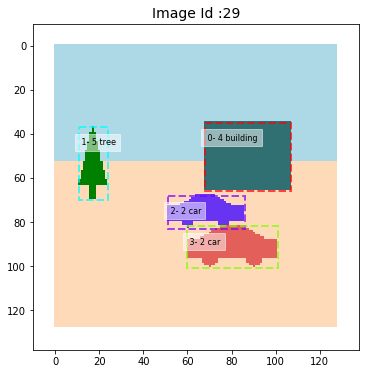

In [6]:
image_id = 29
save_shapes = copy.copy(dataset_test.image_info[image_id]['shapes'])
pp.pprint(save_shapes)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
image_id  =29 
bldg = ('building', (48.0, 111.0, 114.0), (87, 50, 19, 15))
tree = ('tree', (0.0, 128.0, 0.0), (17, 53, 6, 16))
car_1= ('car', (104.0, 52.0, 242.0), (68, 76, 17, 8))
car_2= ('car', (227.0, 95.0, 90.0), (100, 92, 20, 10))




###  Car- horizontially moving person across imge  

29
 Image_id    :  29  Reference:  [('car', (0.0, 0.0, 0.0), (60, 92, 16, 8)), ('person', (255.0, 255.0, 255.0), (60, 92, 2, 12))] Coco Id: 29
 Image meta  :  [ 29 128 128   3   0   0 128 128   1   1]
 Class ids   :  (2,)    [2 1]
 Class Names :  ['car', 'person']

GT_BOXES for image  29
--------------------------------------------------------------------------------
        class             |                              
seq  id name              |  Y1  X1  Y2  X2     CX     CY    AREA
--------------------------------------------------------------------------------
  0  2 car                |  84  44  99  77    60.5   91.5   495.00
  1  1 person             |  78  58 102  63    60.5   90.0   120.00



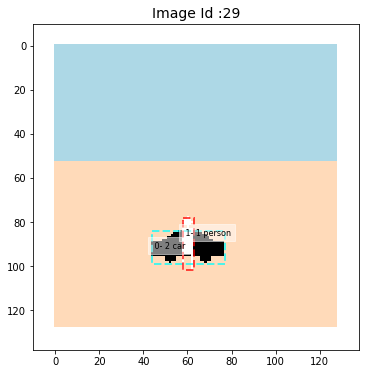

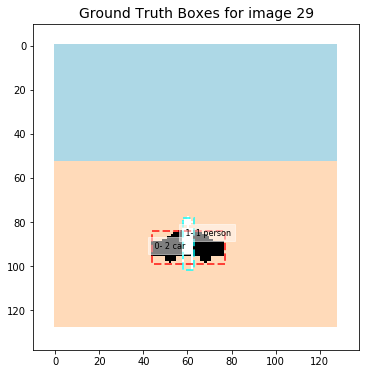

In [37]:
print(image_id)
cx = 60
cy = 92

person_color = (139.0, 69.0, 19.0)
red = (227.0, 95.0, 90.0)
black = (0.0, 0.0, 0.0)
white  = (255.0, 255.0,255.0)
# car_2black= ('car'   ,black, (60, cy, 20, 10))
car_2black= ('car'   ,black , (60, cy, 16, 8))   ## SMALL CAR
person    = ('person', (139.0, 69.0, 19.0)  , (cx , cy,  2, 12))
person    = ('person', white  , (cx , cy,  2, 12))
# truck = ('truck', (150.0, 174.0, 8.0), (95, 93, 23, 11))
# airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))

dataset_test.image_info[image_id]['shapes'] = []
# dataset_test.image_info[image_id]['shapes'].append(bldg)
# dataset_test.image_info[image_id]['shapes'].append(tree)
dataset_test.image_info[image_id]['shapes'].append(car_2black)
dataset_test.image_info[image_id]['shapes'].append(person)


vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
vis2.display_gt_bboxes(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# r = run_fcn_inference(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
# vis2.display_pr_fcn_scores(r[0], class_names)

cx: 5  fcn_score2 person : 0.668  fcn_score2 car: 0.6181
cx: 10  fcn_score2 person : 0.5146  fcn_score2 car: 0.6186
cx: 15  fcn_score2 person : 0.6415  fcn_score2 car: 0.6191
cx: 20  fcn_score2 person : 0.5685  fcn_score2 car: 0.6199
cx: 25  fcn_score2 person : 0.5655  fcn_score2 car: 0.6213
cx: 30  fcn_score2 person : 0.664  fcn_score2 car: 0.6227
cx: 35  fcn_score2 person : 0.6115  fcn_score2 car: 0.6213
cx: 40  fcn_score2 person : 0.622  fcn_score2 car: 0.5948
cx: 45  fcn_score2 person : 0.6311  fcn_score2 car: 0.5989
cx: 50  fcn_score2 person : 0.5973  fcn_score2 car: 0.5029
cx: 55  fcn_score2 person : 0.6659  fcn_score2 car: 0.433
cx: 60  fcn_score2 person : 0.4455  fcn_score2 car: 0.2196
cx: 65  fcn_score2 person : 0.6552  fcn_score2 car: 0.037
cx: 70  fcn_score2 person : 0.7114  fcn_score2 car: 0.5272
cx: 75  fcn_score2 person : 0.6631  fcn_score2 car: 0.5703
cx: 80  fcn_score2 person : 0.6044  fcn_score2 car: 0.6302
cx: 85  fcn_score2 person : 0.6478  fcn_score2 car: 0.6071
cx:

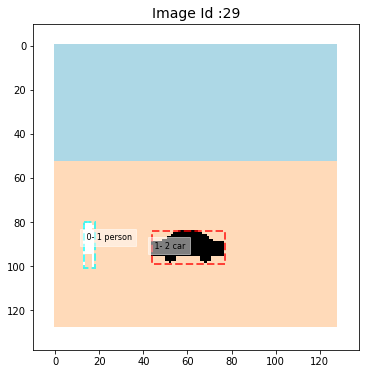

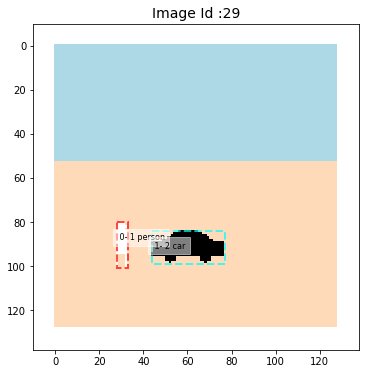

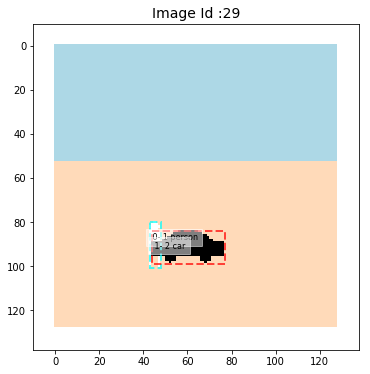

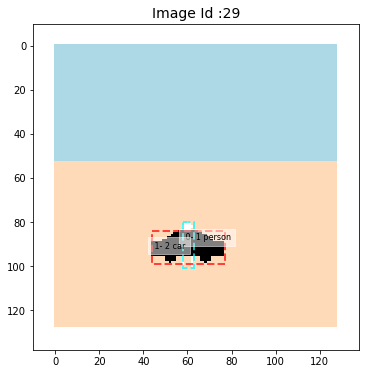

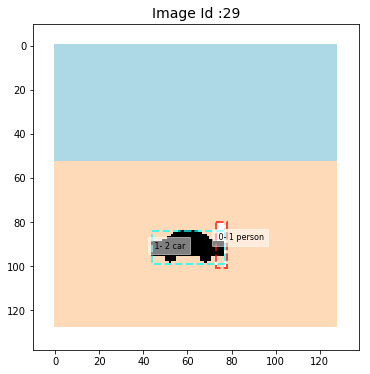

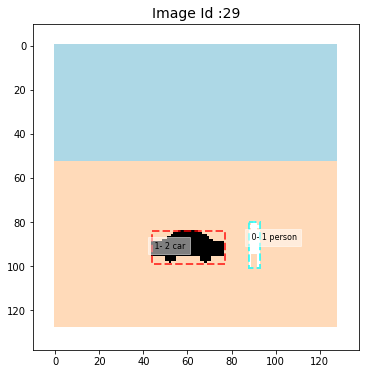

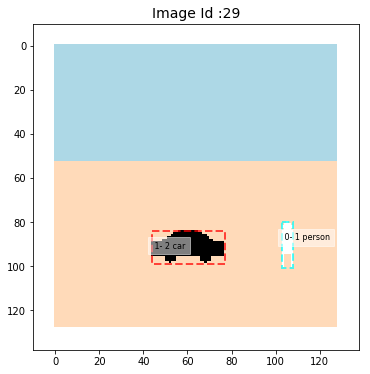

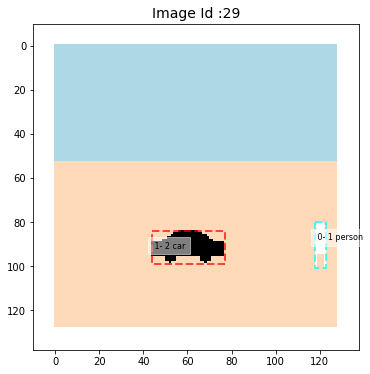

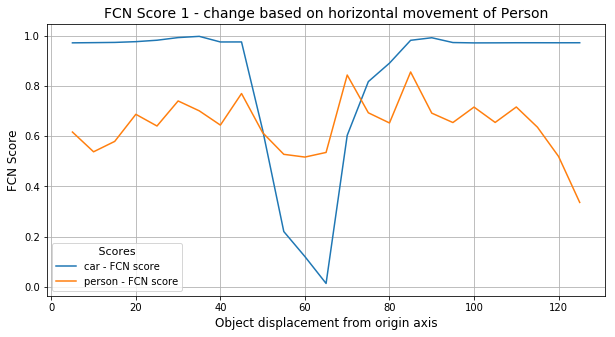

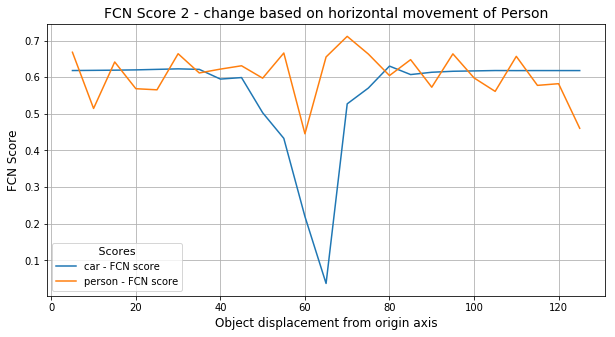

In [38]:
scores_person  = {}
baseline_scores = {}
scores_person2  = {}
baseline_scores2 = {}

xy_movement = np.arange(5,130,5)
for cx in xy_movement:    
    person    = ('person'  ,  white , (cx , cy,  2, 10))
    dataset_test.image_info[image_id]['shapes'][0] = person
    dataset_test.image_info[image_id]['shapes'][1] = car_2black
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    if cx % 15 == 0 :
        vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)       
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_person:
            scores_person[cls_name] = []
            baseline_scores[cls_name] = []
        if cls_name  not in scores_person2:
            scores_person2[cls_name] = []
            baseline_scores2[cls_name] = []            
        scores_person[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
        scores_person2[cls_name].append(round(fcn_row[SCORE_2_COLUMN],4))  
        baseline_scores2[cls_name].append(round(mrcnn_row[SCORE_2_COLUMN],4))
    
    print('cx:', cx, ' fcn_score2 person :', scores_person2['person'][-1], ' fcn_score2 car:', scores_person2['car'][-1])
# print(scores_person)
# print(baseline_scores)
vis2.plot_fcn_score_curves(xy_movement, scores_person, baseline_scores, class_names,
                           title = 'FCN Score 1 - change based on horizontal movement of Person',  classes = ['car', 'person'])
vis2.plot_fcn_score_curves(xy_movement, scores_person2, baseline_scores2, class_names,
                           title = 'FCN Score 2 - change based on horizontal movement of Person', classes = ['car', 'person'])

cx: 5  fcn_score2 person : 0.668  fcn_score2 car: 0.5619
cx: 10  fcn_score2 person : 0.5146  fcn_score2 car: 0.5624
cx: 15  fcn_score2 person : 0.6415  fcn_score2 car: 0.563
cx: 20  fcn_score2 person : 0.5684  fcn_score2 car: 0.5638
cx: 25  fcn_score2 person : 0.5657  fcn_score2 car: 0.5649
cx: 30  fcn_score2 person : 0.6644  fcn_score2 car: 0.5675
cx: 35  fcn_score2 person : 0.6138  fcn_score2 car: 0.5656
cx: 40  fcn_score2 person : 0.6251  fcn_score2 car: 0.5241
cx: 45  fcn_score2 person : 0.6349  fcn_score2 car: 0.5178
cx: 50  fcn_score2 person : 0.6021  fcn_score2 car: 0.3696
cx: 55  fcn_score2 person : 0.6732  fcn_score2 car: -0.2831
cx: 60  fcn_score2 person : 0.5414  fcn_score2 car: -0.1582
cx: 65  fcn_score2 person : 0.6615  fcn_score2 car: -0.1699
cx: 70  fcn_score2 person : 0.7073  fcn_score2 car: 0.428
cx: 75  fcn_score2 person : 0.6582  fcn_score2 car: 0.5431
cx: 80  fcn_score2 person : 0.6079  fcn_score2 car: 0.5681
cx: 85  fcn_score2 person : 0.6508  fcn_score2 car: 0.560

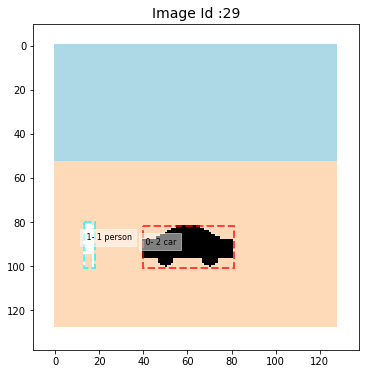

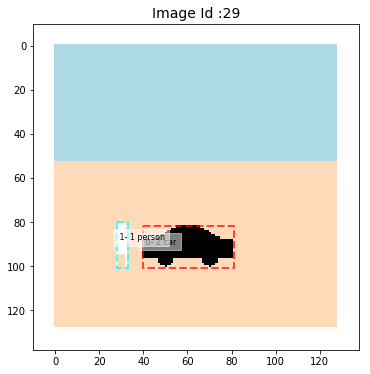

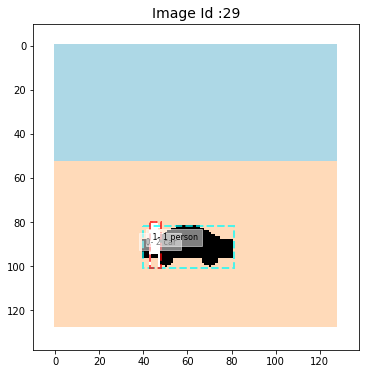

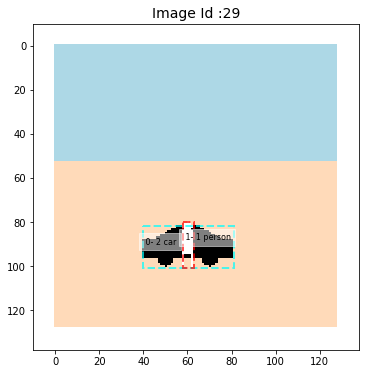

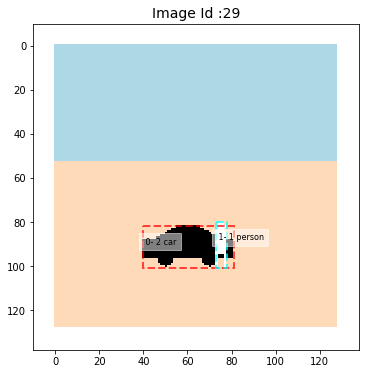

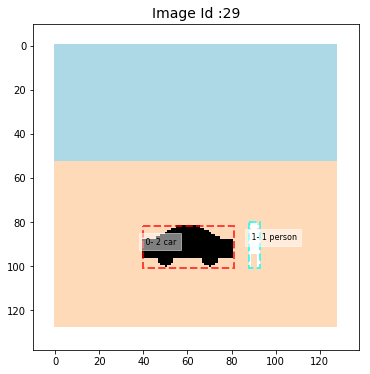

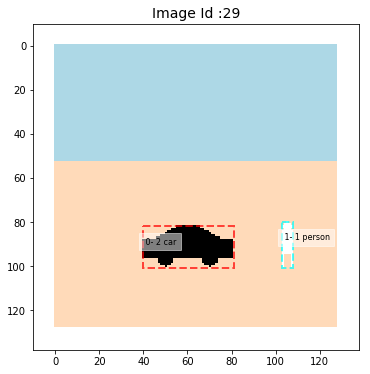

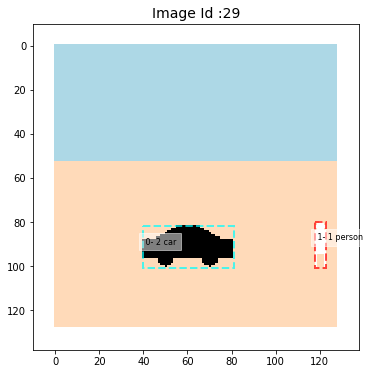

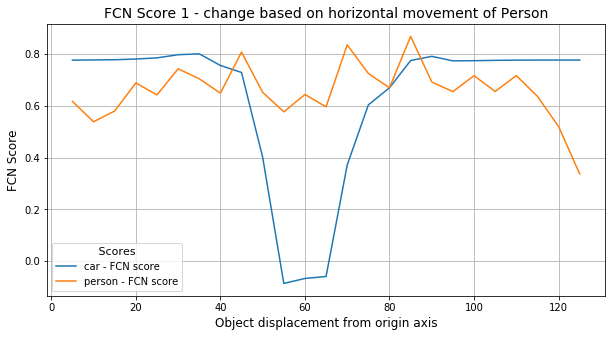

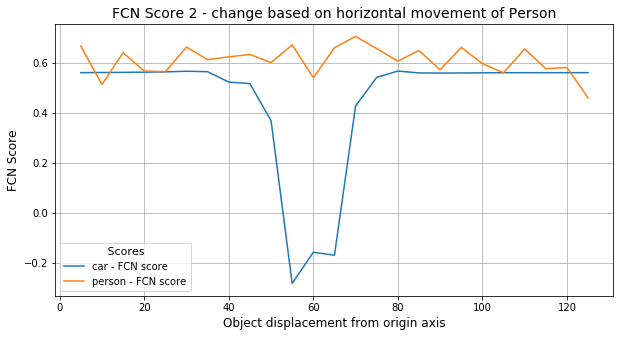

In [22]:
scores_person  = {}
baseline_scores = {}
scores_person2  = {}
baseline_scores2 = {}

xy_movement = np.arange(5,130,5)
for cx in xy_movement:    
    person    = ('person'  ,  white , (cx , cy,  2, 10))
    dataset_test.image_info[image_id]['shapes'][1] = person
    dataset_test.image_info[image_id]['shapes'][0] = car_2black
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    if cx % 15 == 0 :
        vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)       
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_person:
            scores_person[cls_name] = []
            baseline_scores[cls_name] = []
        if cls_name  not in scores_person2:
            scores_person2[cls_name] = []
            baseline_scores2[cls_name] = []            
        scores_person[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
        scores_person2[cls_name].append(round(fcn_row[SCORE_2_COLUMN],4))  
        baseline_scores2[cls_name].append(round(mrcnn_row[SCORE_2_COLUMN],4))
    
    print('cx:', cx, ' fcn_score2 person :', scores_person2['person'][-1], ' fcn_score2 car:', scores_person2['car'][-1])
# print(scores_person)
# print(baseline_scores)
vis2.plot_fcn_score_curves(xy_movement, scores_person, baseline_scores, class_names, title = 'FCN Score 1 - change based on horizontal movement of Person',  classes = ['car', 'person'])
vis2.plot_fcn_score_curves(xy_movement, scores_person2, baseline_scores2, class_names, title = 'FCN Score 2 - change based on horizontal movement of Person', classes = ['car', 'person'])

###  Person- horizontially moving car across imge  

29
 Image_id    :  29  Reference:  [('person', (255.0, 255.0, 255.0), (60, 92, 2, 12)), ('car', (227.0, 95.0, 90.0), (30, 92, 16, 8))] Coco Id: 29
 Image meta  :  [ 29 128 128   3   0   0 128 128   1   1]
 Class ids   :  (2,)    [1 2]
 Class Names :  ['person', 'car']


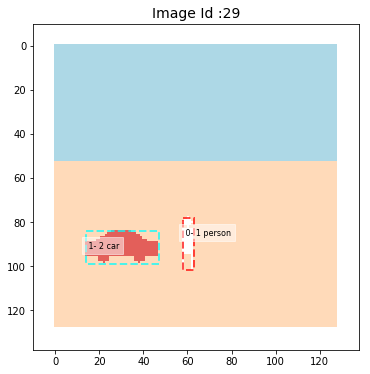

In [41]:
cx = 10
cy = 92
person_color = (139.0, 69.0, 19.0)
red = (227.0, 95.0, 90.0)
black = (0.0, 0.0, 0.0)
white  = (255.0, 255.0,255.0)
# car_2 = ('car'     , (227.0, 95.0, 90.0), (60, cy, 20, 10))
car_2black = ('car'     , black , (30, cy, 20, 10))
car_2black = ('car'     , red , (30, cy, 16, 8))
person     = ('person'  , white, (60 ,cy,  2, 12))
# vis2.display_gt_bboxes(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

print(image_id)
# truck = ('truck', (150.0, 174.0, 8.0), (95, 93, 23, 11))
# airplane = ('airplane', (200.0, 132.0, 126.0), (25, 23, 18, 7))

dataset_test.image_info[image_id]['shapes'] = []
# dataset_test.image_info[image_id]['shapes'].append(bldg)
# dataset_test.image_info[image_id]['shapes'].append(tree)
dataset_test.image_info[image_id]['shapes'].append(person)
dataset_test.image_info[image_id]['shapes'].append(car_2black)
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# r = run_fcn_inference(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
# vis2.display_fcn_hm(vis2.normalize_all(r[0]['fcn_hm'][1:]), class_names, columns =9, size = 8)
# vis2.display_pr_fcn_scores(r[0], class_names)

cx: 5  fcn_score2 person : 0.5945  fcn_score2 car: 0.6061
cx: 10  fcn_score2 person : 0.5944  fcn_score2 car: 0.5891
cx: 15  fcn_score2 person : 0.5942  fcn_score2 car: 0.6138
cx: 20  fcn_score2 person : 0.5944  fcn_score2 car: 0.5749
cx: 25  fcn_score2 person : 0.5947  fcn_score2 car: 0.6513
cx: 30  fcn_score2 person : 0.5975  fcn_score2 car: 0.6102
cx: 35  fcn_score2 person : 0.5939  fcn_score2 car: 0.6418
cx: 40  fcn_score2 person : 0.5836  fcn_score2 car: 0.6433
cx: 45  fcn_score2 person : 0.5755  fcn_score2 car: 0.5193
cx: 50  fcn_score2 person : 0.5335  fcn_score2 car: 0.4729
cx: 55  fcn_score2 person : 0.6193  fcn_score2 car: 0.4061
cx: 60  fcn_score2 person : 0.4697  fcn_score2 car: 0.271
cx: 65  fcn_score2 person : 0.67  fcn_score2 car: 0.5694
cx: 70  fcn_score2 person : 0.6651  fcn_score2 car: 0.6012
cx: 75  fcn_score2 person : 0.5869  fcn_score2 car: 0.6108
cx: 80  fcn_score2 person : 0.6012  fcn_score2 car: 0.674
cx: 85  fcn_score2 person : 0.5951  fcn_score2 car: 0.5963
cx

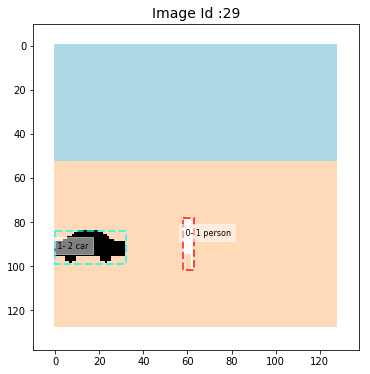

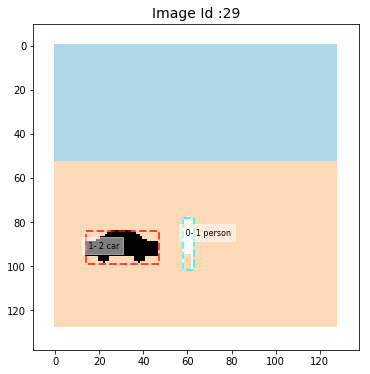

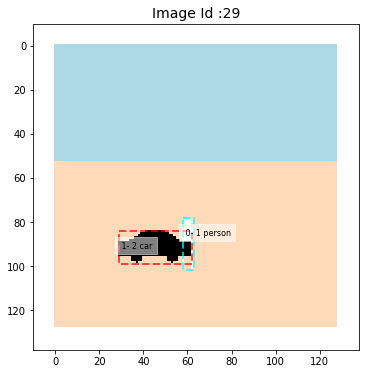

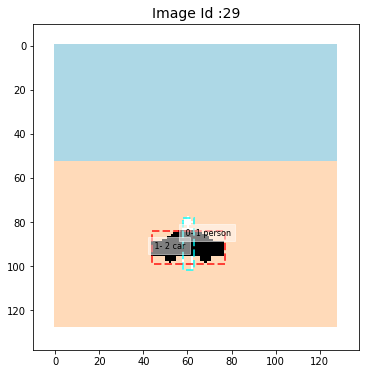

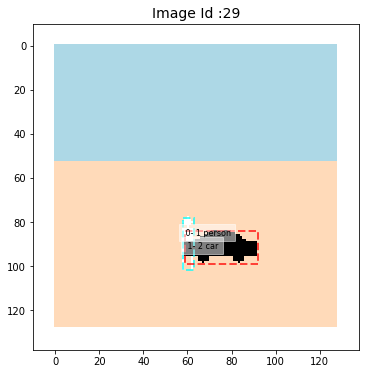

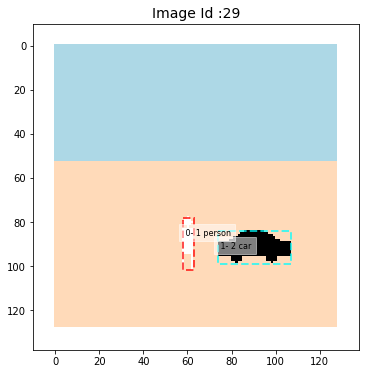

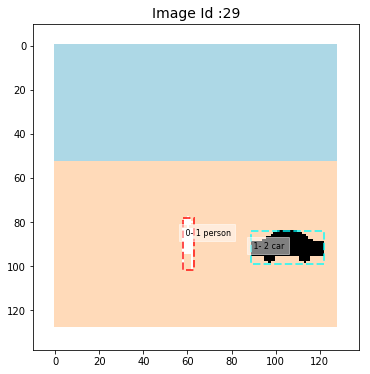

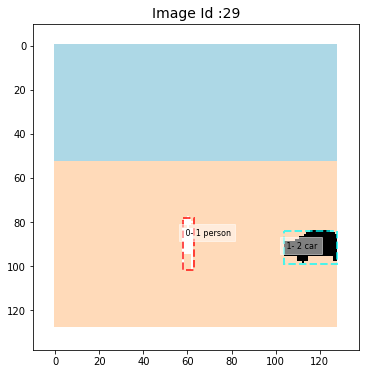

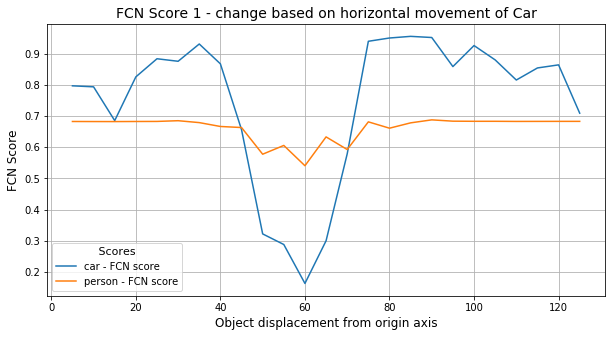

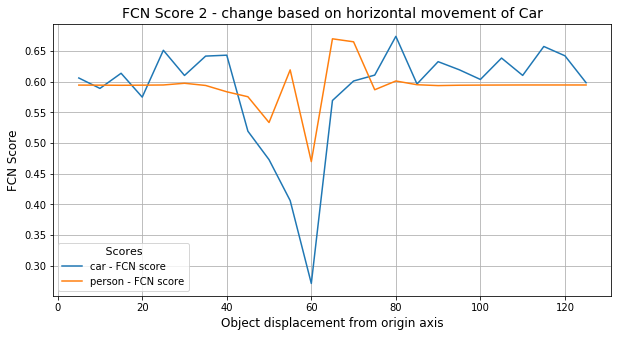

In [42]:
scores_person  = {}
baseline_scores = {}
scores_person2  = {}
baseline_scores2 = {}
xy_movement = np.arange(5,130,5)
for cx in xy_movement:    
#     person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
    car_2= ('car', black, (cx, cy, 16, 8))
    dataset_test.image_info[image_id]['shapes'][0] = person
    dataset_test.image_info[image_id]['shapes'][1] = car_2
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
    if cx % 15 == 0 :
        vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_person:
            scores_person[cls_name] = []
            baseline_scores[cls_name] = []
        if cls_name  not in scores_person2:
            scores_person2[cls_name] = []
            baseline_scores2[cls_name] = []            
        scores_person[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
        scores_person2[cls_name].append(round(fcn_row[SCORE_2_COLUMN],4))  
        baseline_scores2[cls_name].append(round(mrcnn_row[SCORE_2_COLUMN],4))
    print('cx:', cx, ' fcn_score2 person :', scores_person2['person'][-1], ' fcn_score2 car:', scores_person2['car'][-1])
print(scores_person)
print(baseline_scores)
vis2.plot_fcn_score_curves(xy_movement, scores_person, baseline_scores, class_names, 
                           title = 'FCN Score 1 - change based on horizontal movement of Car',  classes = ['car', 'person'])
vis2.plot_fcn_score_curves(xy_movement, scores_person2, baseline_scores2, class_names, 
                           title = 'FCN Score 2 - change based on horizontal movement of Car', classes = ['car', 'person'])

cx: 5  fcn_score2 person : 0.5946  fcn_score2 car: 0.5335
cx: 10  fcn_score2 person : 0.5945  fcn_score2 car: 0.5576
cx: 15  fcn_score2 person : 0.5945  fcn_score2 car: 0.6031
cx: 20  fcn_score2 person : 0.5947  fcn_score2 car: 0.5153
cx: 25  fcn_score2 person : 0.5947  fcn_score2 car: 0.6284
cx: 30  fcn_score2 person : 0.5971  fcn_score2 car: 0.5507
cx: 35  fcn_score2 person : 0.5989  fcn_score2 car: 0.5949
cx: 40  fcn_score2 person : 0.5977  fcn_score2 car: 0.5823
cx: 45  fcn_score2 person : 0.5977  fcn_score2 car: 0.4525
cx: 50  fcn_score2 person : 0.5971  fcn_score2 car: 0.2587
cx: 55  fcn_score2 person : 0.6728  fcn_score2 car: 0.2576
cx: 60  fcn_score2 person : 0.5583  fcn_score2 car: -0.02
cx: 65  fcn_score2 person : 0.6317  fcn_score2 car: 0.1845
cx: 70  fcn_score2 person : 0.6524  fcn_score2 car: 0.4812
cx: 75  fcn_score2 person : 0.5825  fcn_score2 car: 0.519
cx: 80  fcn_score2 person : 0.5947  fcn_score2 car: 0.6146
cx: 85  fcn_score2 person : 0.5944  fcn_score2 car: 0.5411


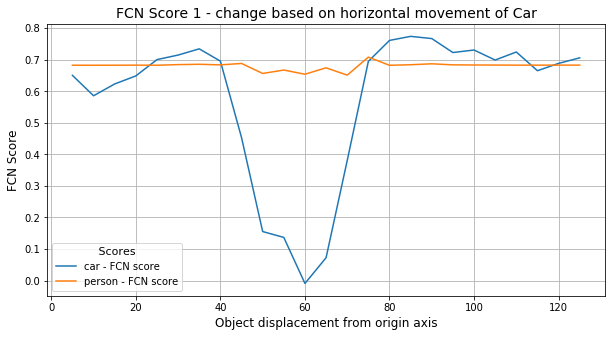

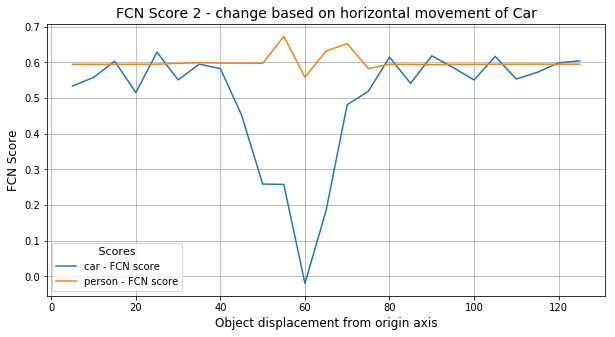

In [31]:
scores_person  = {}
baseline_scores = {}
scores_person2  = {}
baseline_scores2 = {}
xy_movement = np.arange(5,130,5)
for cx in xy_movement:    
#     person    = ('person'  , (139.0, 69.0, 19.0)  , (cx , cy,  2, 10))
    car_2= ('car', black, (cx, cy, 20, 10))
    dataset_test.image_info[image_id]['shapes'][1] = person
    dataset_test.image_info[image_id]['shapes'][0] = car_2
    r = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     if cx % 15 == 0 :
#         vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)    
    for idx, (mrcnn_row, fcn_row) in enumerate(  zip(r[0]['pr_scores'],r[0]['fcn_scores'])): 
        cls = int(fcn_row[CLASS_COLUMN])
        cls_name = class_names[cls]
        if cls_name  not in scores_person:
            scores_person[cls_name] = []
            baseline_scores[cls_name] = []
        if cls_name  not in scores_person2:
            scores_person2[cls_name] = []
            baseline_scores2[cls_name] = []            
        scores_person[cls_name].append(round(fcn_row[SCORE_1_COLUMN],4))  
        baseline_scores[cls_name].append(round(mrcnn_row[SCORE_1_COLUMN],4))
        scores_person2[cls_name].append(round(fcn_row[SCORE_2_COLUMN],4))  
        baseline_scores2[cls_name].append(round(mrcnn_row[SCORE_2_COLUMN],4))
    print('cx:', cx, ' fcn_score2 person :', scores_person2['person'][-1], ' fcn_score2 car:', scores_person2['car'][-1])
print(scores_person)
print(baseline_scores)
vis2.plot_fcn_score_curves(xy_movement, scores_person, baseline_scores, class_names, 
                           title = 'FCN Score 1 - change based on horizontal movement of Car',  classes = ['car', 'person'])
vis2.plot_fcn_score_curves(xy_movement, scores_person2, baseline_scores2, class_names, 
                           title = 'FCN Score 2 - change based on horizontal movement of Car', classes = ['car', 'person'])

###  Image 29 Misc

In [ ]:
dataset_test.image_info[29]['shapes'][0] =  ('car', (104.0, 52.0, 242.0),(80, 60,15,7))
vis.display_image_gt(dataset_test, dataset_test.config, 29, size=6, verbose = True)

In [ ]:
person = ('person', (240.0, 230.0, 140.0), (50, 26, 2, 10))
dataset_test.image_info[29]['shapes'][-1] = (person)

In [ ]:
vis.display_image_gt(dataset_test, dataset_test.config, 29, size=6, verbose = True)
vis2.display_gt_bboxes(dataset_test, dataset_test.config, 29)

In [ ]:
print(image_id)
# for y in range(60, 100, 2):
#     x = 60
#     person = ('person', (240.0, 230.0, 140.0), (x, y, 2, 10))
#     dataset_test.image_info[29]['shapes'][-1] = person
#     fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
#     r = fcn_results[0]
#     vis2.display_fcn_hm(vis2.normalize_all(r['fcn_hm'][...,:3]), class_names, columns = 3, size = 8)

## Helper functions 

In [ ]:
def plot_fcn_score_curves(x_y_dim, fcn_scores, mrcnn_scores, class_names, ax = None , min_x = 0.0, title = None):
    if ax is None:
        plt.figure(figsize=(10,5))
        ax = plt.gca()

    # scores is always passed ffom plot_mAP_by_scores, so it's nver None
    # so we loop on scores instead of sorted(class_data)
    # for idx, score_key in enumerate(sorted(class_data)):
    for idx, cls  in enumerate(fcn_scores):
        ax.plot(x_y_dim, fcn_scores[cls], label= cls + ' - FCN score')
        # if  scores is not None and score_key not in  scores:
            # continue        
#         print('score_key is: {:20s} iou: {:6.3f}  avg_prec: {:10.4f}'.format(score_key,  iou_key, class_data[score_key][iou_key]['avg_prec']))
#         score_keys.append(score_key)
#         avg_precs[score_key] = class_data[score_key][iou_key]['avg_prec']
#         precisions = class_data[score_key][iou_key]['precisions']
#         recalls    = class_data[score_key][iou_key]['recalls']
#         label      = '{:15s}'.format(score_key)
        
#         score_idx  = scores.index(score_key)
#         print('idx: ', idx, ' Score_key: ' , score_key, 'Score Index: ' , score_idx, 'color:', SCORE_COLORS[score_key])
    
    for idx, cls  in enumerate(mrcnn_scores):
        ax.plot(x_y_dim, mrcnn_scores[cls], label= cls + ' - MR-CNN score')
        
    print(' y limit:', plt.ylim(), ' xlimit : ', plt.xlim())

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Object displacement from origin axis', fontsize= 12)
    ax.set_ylabel('FCN Score', fontsize= 12)
    ax.tick_params(axis='both', labelsize = 10)
#     ax.set_xlim([min_x,1.05])
#     ax.set_ylim([all_scores.min()-0.05, all_scores.max()+0.05])
    leg = plt.legend(loc='lower left',frameon=True, fontsize = 10, markerscale = 6)
    leg.set_title(' Scores ',prop={'size':11})
    plt.grid(True)
#     for xval in np.linspace(0.0, 1.0, 11):
#         plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed', linewidth=1)

def plot_fcn_score_curves_1(x_y_dim, cls_scores, cls_name, ax = None , min_x = 0.0, title = None):

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Object displacement from origin axis', fontsize= 12)
    ax.set_ylabel('FCN Score', fontsize= 12)
    ax.tick_params(axis='both', labelsize = 10)
#     ax.set_xlim([min_x,1.05])
#     ax.set_ylim([all_scores.min()-0.05, all_scores.max()+0.05])
    leg = plt.legend(loc='lower left',frameon=True, fontsize = 10, markerscale = 6)
    leg.set_title(' Scores ',prop={'size':11})
    plt.grid(True)
#     for xval in np.linspace(0.0, 1.0, 11):
#         plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed', linewidth=1)

In [ ]:
def aggregate_results(fcn_results, results):
    r = fcn_results[0]
        
    gt_inst_per_class = np.bincount(np.abs(r['gt_class_ids']), minlength = NUM_CLASSES)
    dt_inst_per_class = np.bincount(r['class_ids']           , minlength = NUM_CLASSES)

    results['gt_cls_counts'] += gt_inst_per_class
    results['dt_cls_counts'] += dt_inst_per_class

    for i in range(NUM_CLASSES):
        results['gt_ttl_img_by_inst'][i,gt_inst_per_class[i]] += 1
        results['dt_ttl_img_by_inst'][i,dt_inst_per_class[i]] += 1


    if len(r['class_ids']) == 1: 
        results['imgs_one_dt'] += 1
    if len(r['gt_class_ids']) == 1:
        results['imgs_one_gt'] += 1

    fcn_hm_max   = np.max(r['fcn_hm'])
    fcn_hm_min   = np.min(r['fcn_hm'])
    pr_hm_max    = np.max(r['pr_hm'])
    pr_hm_min    = np.min(r['pr_hm'])
    
    if fcn_hm_max > results['sav_fcn_max'] :
        results['sav_fcn_max'] = fcn_hm_max

    if fcn_hm_min < results['sav_fcn_min'] :
        results['sav_fcn_min'] = fcn_hm_min

    if pr_hm_max > results['sav_pr_max']:
        results['sav_pr_max'] = pr_hm_max

    if pr_hm_min > results['sav_pr_min']:
        results['sav_pr_min'] = pr_hm_min
    
    results['pr_agg_hm']          += r['pr_hm']
    results['fcn_agg_hm']         += r['fcn_hm']
    results['pr_agg_hm_clipped']  += np.clip(r['pr_hm'], 0.0, 1.0)
    results['fcn_agg_hm_clipped'] += np.clip(r['fcn_hm'], 0.0, 1.0)



    return results
        
def save_results(results, save_path, save_file):
    print(' Save to output file: ',save_path, save_file)
    np.savez_compressed(os.path.join(save_path, save_file),     
                    imgs_one_gt        = results['imgs_one_gt'], 
                    imgs_one_dt        = results['imgs_one_dt'],  
                    gt_cls_counts      = results['gt_cls_counts'], 
                    dt_cls_counts      = results['dt_cls_counts'],
                    gt_ttl_img_by_inst = results['gt_ttl_img_by_inst'],
                    dt_ttl_img_by_inst = results['dt_ttl_img_by_inst'],
                    sav_pr_min         = results['sav_pr_min']  ,
                    sav_pr_max         = results['sav_pr_max']  , 
                    sav_fcn_min        = results['sav_fcn_min'] , 
                    sav_fcn_max        = results['sav_fcn_max'] ,                     
                    pr_agg_hm          = results['pr_agg_hm']  ,
                    fcn_agg_hm         = results['fcn_agg_hm']  ,
                    pr_agg_hm_clipped  = results['pr_agg_hm_clipped'],
                    fcn_agg_hm_clipped = results['fcn_agg_hm_clipped'] )     
    return 0


def display_results(results):
    np_format = {}
    np_format['float']  = lambda x: "%10.4f" % x
    np_format['int']    = lambda x: "%6d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
    
    print()
    print(' Final Results:')
    print('---------------')
    print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(results['sav_pr_min'], results['sav_pr_max']))
    print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(results['sav_fcn_min'], results['sav_fcn_max']))
    print()
    print(' images with one gt object:', results['imgs_one_gt'], '  one detection from MR-CNN:', results['imgs_one_dt'])
    print(' Ground Truth by class    :', results['gt_cls_counts'])
    print(' Detections by class      :', results['dt_cls_counts'])
    print()
    print(' Original Heatmap:')
    print(' ----------------')
    print('    pr_hm mins: ',np.min(results['pr_agg_hm'] , axis=(0,1)))
    print('          maxs: ',np.max(results['pr_agg_hm'] , axis=(0,1)))
    print()
    print('   fcn_hm mins: ',np.min(results['fcn_agg_hm'], axis=(0,1)))
    print('          maxs: ',np.max(results['fcn_agg_hm'], axis=(0,1)))
    print()
    print('   pr_hm sums : ',np.sum(results['pr_agg_hm'] , axis=(0,1)))
    print('   fcn_hm sums: ',np.sum(results['fcn_agg_hm'], axis=(0,1)))
    print()
    print(' Clipped Heatmap:')
    print(' ----------------')
    print('   pr_hm mins : ',np.min(results['pr_agg_hm_clipped'], axis=(0,1)))
    print('         maxs : ',np.max(results['pr_agg_hm_clipped'], axis=(0,1)))
    print('  fcn_hm mins : ',np.min(results['fcn_agg_hm_clipped'], axis=(0,1)))
    print('         maxs : ',np.max(results['fcn_agg_hm_clipped'], axis=(0,1)))
    print('   pr_hm sums : ',np.sum(results['pr_agg_hm_clipped'], axis=(0,1)))
    print('  fcn_hm sums : ',np.sum(results['fcn_agg_hm_clipped'], axis=(0,1)))

    print('\n gt_ttl_img_by_inst', results['gt_ttl_img_by_inst'].shape)
    print(' ------------------')
    print(results['gt_ttl_img_by_inst'][:,:16])
    print('\n dt_ttl_img_by_inst : ', results['dt_ttl_img_by_inst'].shape)
    print(' ------------------')
    print(results['dt_ttl_img_by_inst'][:,:16])
    return(0)

## Heatmap aggregation over a number of images

In [ ]:
np_format = {'float': lambda x: "%10.4f" % x, 'int': lambda x: "%8d" % x}
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format), 

### Load weight file

In [ ]:
FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000'
fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
          'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
          'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
          'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
          'fcn_0033.h5', 
          'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 'fcn_0077.h5', 'fcn_0089.h5',    ## 17,18,19,20,21
          'fcn_0170.h5', 'fcn_0177.h5', 'fcn_0253.h5', 'fcn_0266.h5']  ## 22,23,24,25

FILE_IDX = 2    ## fcn_0003
FILE_IDX = 5    ## fcn_0006
FILE_IDX = 13   ## fcn_0022
FILE_IDX = 17   ## fcn_0039
FILE_IDX = 18   ## fcn_0042
FILE_IDX = 20   ## fcn_0077
FILE_IDX = 21   ## fcn_0089
FILE_IDX = 22   ## fcn_0170
FILE_IDX = 24   ## fcn_0253
weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", weights_file)
fcn_model.load_model_weights(weights_file)

## Move person over image 79

In [ ]:
image_id = 79
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
image_id = 79
### Image 79 orig objects : [('airplane', (215.0, 217.0, 161.0), (31, 23, 16, 6)), ('person', (240.0, 230.0, 140.0), (50, 86, 1, 9))]

# new_obj = ('airplane', (215.0, 217.0, 161.0), (15, 15, 16, 6))
# building = ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20))
airplane = ('airplane', (200.0, 132.0, 126.0), (60, 30, 18, 7))
truck = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))
car = ('car', (150.0, 174.0, 8.0), (87, 90, 22, 11))
person = ('person', (240.0, 230.0, 140.0), (50, 86, 2, 10))
new_obj = ('airplane', (215.0, 217.0, 161.0), (15, 15, 16, 6))
# new_obj = ('sun', (255.0, 215.0, 0.0), (67, 9, 6, 6))
# new_obj = ('sun', (0.0, 0.0, 0.0), (cx, cy, 6, 6))        

# del dataset_test.image_info[image_id]['shapes']
dataset_test.image_info[image_id]['shapes'] = []
dataset_test.image_info[image_id]['shapes'].append(car)
dataset_test.image_info[image_id]['shapes'].append(airplane)
dataset_test.image_info[image_id]['shapes'].append(person)

# dataset_test.image_info[image_id]['shapes'].append(building)
# dataset_test.image_info[image_id]['shapes'].append(truck)
 

In [ ]:
print(dataset_test.image_info[image_id]['shapes'])
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
# fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = True) 

### Run person over image : Run `compute_ap` over images

In [ ]:
save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/other"
exp_desc = 'car_mvmt_w_prsn'
exp_desc = 'prsn_mvmt_w_car_airp'

black = (0.0, 0.0, 0.0)
FROM  = 4
TO    = 124
STEP_SIZE = 4
NUM_CLASSES = 9
image_id   = 79

# del dataset_test.image_info[image_id]['shapes'][-1]
vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)

In [ ]:
#---------------------------------------------------------------------------------------
# for FILE_IDX in [2,5,13,18,21,22,24]:
# for FILE_IDX in [ 17, 18, 21 ]:    

# for FILE_IDX in [ 17, 18, 21, 22, 23, 24, 25 ]:    
for FILE_IDX in [  25 ]:    
    weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
    fcn_model.load_model_weights(weights_file)
    
    epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
    print('Weight file: ', weights_file, ' epochs:', epochs)

    ###  Initialize data structures 
    failed_predicts = 0
    agg_hm_shape = (128,128,NUM_CLASSES)

    results = {}
    results['pr_agg_hm']          = np.zeros(agg_hm_shape)
    results['fcn_agg_hm']         = np.zeros(agg_hm_shape)
    results['pr_agg_hm_clipped']  = np.zeros(agg_hm_shape)
    results['fcn_agg_hm_clipped'] = np.zeros(agg_hm_shape)
#     results['fcn_hm_delta']       = np.zeros(agg_hm_shape)
    results['gt_cls_counts']      = np.zeros((NUM_CLASSES), dtype = np.int)
    results['dt_cls_counts']      = np.zeros((NUM_CLASSES), dtype = np.int)
    results['gt_ttl_img_by_inst'] = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
    results['dt_ttl_img_by_inst'] = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
   
    results['imgs_one_gt'] = 0
    results['imgs_one_dt'] = 0
    results['sav_pr_min']  = 0
    results['sav_pr_max']  = 0
    results['sav_fcn_min'] = 0
    results['sav_fcn_max'] = 0


    print('==> Calculate Heatmap aggregates for image_id : ', image_id)
    for cx in range(FROM,TO, STEP_SIZE):
        print('cx: ', cx)
        for cy in range(FROM, TO, STEP_SIZE):    
            
#                 new_obj = ('car', black, (cx, cy, 15, 7))                      ## image 79
#             new_obj = ('car', (150.0, 174.0, 8.0), (cx, cy, 22, 11))     ## image 79 - move car around 
    
            new_obj = ('person', (0.0, 0.0, 0.0), (cx, cy, 2, 10))         ## image 176, 29

#                 new_obj = ('sun', (0.0, 0.0, 0.0), (cx, cy, 4, 4))             ## image 18  - moving sun - black
#                 new_obj = ('sun', (255.0, 215.0, 0.0), (cx, cy, 4, 4))         ## image 18 - moving sun - color

#                 new_obj = ('building', (0.0, 0.0, 0.0), (cx, cy, 16, 16))      ## image 67 - moving building
#                 new_obj = ('airplane', (0.0, 0.0, 0.0), (cx, cy, 16, 6))       ## image 67 - moving airplane - black
#                 new_obj = ('airplane', (215.0, 217.0, 161.0), (cx, cy, 16, 6)) ## image 67 - moving airplane - color
#                 new_obj = ('sun', (0.0, 0.0, 0.0), (cx, cy, 6, 6))             ## image 67 - moving sun - color
#                 new_obj = ('sun', (255.0, 215.0, 0.0), (cx, cy, 6, 6))         ## image 67 - moving sun - color

#             new_obj = ('airplane', (200.0, 132.0, 126.0), (cx, cy, 18, 7))       ## IMAGE 77 - moving airplane color
#             new_obj = ('car', (200.0, 132.0, 126.0), (cx, cy, 16, 7))          ## IMAGE 77 - moving car color
#             new_obj = ('truck', (83.0, 192.0, 78.0), (65, 71, 25, 8))    ## image 77 - moving truck

            dataset_test.image_info[image_id]['shapes'].append(new_obj)
#             if cx % 10 == 0 and cy % 20 == 0:
#                 vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = False)

#             print(dataset_test.image_info[image_id]['shapes'])
#             vis.display_image_gt(dataset_test, dataset_test.config, image_id, size=6, verbose = True)
            
        
            try:
#                 fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
                fcn_results = run_fcn_evaluation(fcn_model, mrcnn_model, dataset_test, image_id, verbose = False)  
            except Exception as e :
                failed_predicts += 1
                print('    failure on mrcnn predict - image id: {} at cx:{} cy:{}    total failures: {}'.format(image_id, cx, cy, failed_predicts))
            else:    
                results = aggregate_results(fcn_results, results)
                pass

            del dataset_test.image_info[image_id]['shapes'][-1]
            
        
    save_file =  'exp2_i'+str(image_id)+'_e'+epochs+'_'+exp_desc+'.npz'
    save_results(results, save_path, save_file)
    display_results(results)

    print('\n\n Agg heatmap Calcs completed for epoch:', epochs , ' (Weight file:', weights_file, ')')
    print(' Written to :', save_path, save_file)
    print(' Total failed :', failed_predicts)
    

In [ ]:
save_file

### Display FCN output heatmaps for a series of epoch files

In [ ]:
cols = 9 
image_id = 79
exp_desc = 'airp_mvmt_wo_bldg'
exp_desc = 'prsn_mvmt_w_car_airp'
classes = [1,2,3,4,5,6,7,8]
# exp2_i79_e0266_prsn_mvmt_w_car_airp.npz
# for FILE_IDX in [2,5,13,18,21,22,24]:    
# for FILE_IDX in [17,18,21]:
for FILE_IDX in [25]:

    epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
    load_file =  'exp2_i'+str(image_id)+'_e'+epochs+'_'+exp_desc+'.npz'
    filename  = os.path.join(save_path, load_file)
    if os.path.exists(filename):
        print('  input file: ', filename)
        loaddata = np.load(os.path.join(save_path, load_file))
    else: 
        print('file not found ', filename)
        continue 
    pr_agg_hm         = loaddata['fcn_agg_hm']
    pr_agg_hm_clipped = loaddata['pr_agg_hm_clipped']
    fcn_agg_hm         = loaddata['fcn_agg_hm']
    fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']
    gt_cls_counts      = loaddata['gt_cls_counts']  
    dt_cls_counts      = loaddata['dt_cls_counts']      
    ttl = 'fcn hm - img '+str(image_id)+'  epoch:'+str(epochs) +'  '+ exp_desc 

In [ ]:

vis2.display_fcn_agg_heatmaps(pr_agg_hm_clipped, gt_cls_counts, dt_cls_counts, class_names, columns =cols, title = ttl +'- CLIPPED TO 0 ', classes = classes)
vis2.display_fcn_agg_heatmaps(pr_agg_hm, gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- RAW DATA ', norm = False, classes = classes)
vis2.display_fcn_agg_heatmaps(vis2.normalize_fcn_hm(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED PER CLASS ', classes = classes)
vis2.display_fcn_agg_heatmaps(vis2.normalize_all(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED ACROSS ALL CLASSES ', classes = classes)

In [ ]:
classes = [1,2,3,4,5,6,7,8]
vis2.display_fcn_agg_heatmaps(fcn_agg_hm_clipped, gt_cls_counts, dt_cls_counts, class_names, columns =cols, title = ttl +'- CLIPPED TO 0 ', classes = classes)
vis2.display_fcn_agg_heatmaps(fcn_agg_hm, gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- RAW DATA ', norm = False, classes = classes)
vis2.display_fcn_agg_heatmaps(vis2.normalize_fcn_hm(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED PER CLASS ', classes = classes)
vis2.display_fcn_agg_heatmaps(vis2.normalize_all(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, columns = cols, title = ttl +'- NORMALIZED ACROSS ALL CLASSES ', classes = classes)

In [ ]:
delta = fcn_agg_hm_clipped - pr_agg_hm_clipped
vis2.display_fcn_agg_heatmaps(delta, gt_cls_counts, dt_cls_counts, class_names, columns =cols, title = ttl +'- CLIPPED TO 0 ', classes = classes)

In [ ]:
print(fcn_agg_hm.min(axis=(0,1), keepdims = True))
print(fcn_agg_hm.min( keepdims = True))


## Load and Display saved .npz file 

In [ ]:
# epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
epochs = '0266'
image_id =  176
load_file =  'exp2_img'+'_'+str(image_id)+'_epoch_'+epochs+'.npz'
print('  input file: ',os.path.join(save_path, load_file))

In [ ]:
loaddata = np.load(os.path.join(save_path, load_file))
# print(type(loaddata))
# print(loaddata.keys)
# print(type(loaddata['gt_ttl_img_by_inst']),'  ', type(loaddata['gt_ttl_img_by_inst'][0]))

gt_cls_counts      = loaddata['gt_cls_counts']  
dt_cls_counts      = loaddata['dt_cls_counts']  
# imgs_one_gt        = loaddata['imgs_one_gt']  
# imgs_one_dt        = loaddata['imgs_one_dt'] 
# gt_ttl_img_by_inst = loaddata['gt_ttl_img_by_inst']
# dt_ttl_img_by_inst = loaddata['dt_ttl_img_by_inst']
# sav_pr_min         = loaddata['sav_pr_min'] 
# sav_pr_max         = loaddata['sav_pr_max']  
# sav_fcn_min        = loaddata['sav_fcn_min']
# sav_fcn_max        = loaddata['sav_fcn_max']
pr_agg_hm          = loaddata['pr_agg_hm']
pr_agg_hm_clipped  = loaddata['pr_agg_hm_clipped']
fcn_agg_hm         = loaddata['fcn_agg_hm']
fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']

print('Agg heatmap Calcs complete for epoch:', epochs , ' (heatmap file:', load_file, ')')
# display_results(loaddata)

## Display Heatmaps

In [ ]:
# hmfig = vis2.display_pairwise_heatmap(gt_ttl_img_by_inst, [0,1,2,3,4,5,6,7,8], class_names)

### mask_rcnn output

In [ ]:
classes = [1,2,3,4,5,6,7,8]
vis2.display_fcn_input(pr_agg_hm, gt_cls_counts, dt_cls_counts, class_names, classes = classes, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT clipped ')
vis.plot_2d_gaussian(pr_agg_hm[:,:,1], size =(5,5), title = 'MRCNN produced heatmap')

### mask_rcnn output - normalized

In [ ]:
vis2.display_fcn_input_1(vis2.normalize_fcn_hm(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT clipped ')
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(pr_agg_hm[:,:,2]), size =(5,5))

In [ ]:
vis.display_image_gt(dataset_test, dataset_test.config, image_id , size = 5, verbose = False)   

### mask_rcnn output - standarize and clip

In [ ]:
vis2.display_fcn_input_1(vis2.standardize_fcn_hm(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - Standardized - ')
vis2.display_fcn_input_1(vis2.deprocess_image(pr_agg_hm), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT Clipped - Normalized - ')

###  mask_rcnn clipped  
(pr_agg_hm_clipped is same as pr_agg_hm since the ouptut of R-CNN is [0,1]

In [ ]:
vis2.display_fcn_input_1(pr_agg_hm_clipped, gt_cls_counts, dt_cls_counts, class_names , cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0 ,1]')

In [ ]:
vis2.display_fcn_input_1(vis2.normalize_fcn_hm(pr_agg_hm_clipped), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0,1] and Normalized - ')

In [ ]:
vis2.display_fcn_input_1(vis2.deprocess_image(pr_agg_hm_clipped), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0,1] and Normalized - ')

###  fcn

In [ ]:
vis2.display_fcn_input_1(fcn_agg_hm, gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns =7, title = 'fcn heatmaps - NOT clipped to [0,1]')
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,1]), size =(5,5))
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,2]), size =(5,5))

In [ ]:
vis2.display_fcn_input_1(fcn_agg_hm, gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns =7, title = 'fcn heatmaps - NOT clipped to [0,1]')
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,1]), size =(5,5))
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,2]), size =(5,5))

In [ ]:
vis2.display_fcn_input_1(fcn_agg_hm, gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns =7, title = 'fcn heatmaps - NOT clipped to [0,1]')
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,1]), size =(5,5))
vis.plot_2d_gaussian(vis2.normalize_fcn_hm(fcn_agg_hm[:,:,2]), size =(5,5))

### fcn normalized

In [ ]:
vis2.display_fcn_input_1(vis2.normalize_fcn_hm(fcn_agg_hm), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'fcn heatmaps - NOT clipped to [0,1],  Normalized -')

### fcn clipped

In [ ]:
vis2.display_fcn_input_1(fcn_agg_hm_clipped, gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'fcn heatmaps - clipped to [0,1] - ')

### fcn clipped - normalized

In [ ]:
# vis2.display_fcn_input_1(vis2.deprocess_image(fcn_agg_hm_clipped), gt_cls_counts, dt_cls_counts, class_names, cmap = 'jet', columns = 7, title = 'fcn heatmaps - clipped to [0 ,1] and Normalized - ')

## 2D Plots  

####  2D plot of `model_gt_heatmap` returned from model

In [ ]:
fig = visualize.plot_2d_heatmap(model_gt_heatmap, model_gt_heatmap_scores, img_id, gt_class_ids, 
                          class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

####  2D plot of `pred_heatmap_norm` returned from MRCNN 

In [ ]:
fig = visualize.plot_2d_heatmap(model_pr_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3, 
                            class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3,
                          class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_gt_heatmap_scores, img_id,
                                class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

In [ ]:
fig.savefig('fcn_heatmaps_2d.png')

####  2D comparative display `pred_heatmap` / `fcn_heatmap`  

In [ ]:
fig = visualize.plot_2d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, model_pr_heatmap_scores, 
                        img_id, class_ids = pr_class_ids, class_names = coco_class_names, scale = 4, scaling = True )    

##  3D Plots

####  3D plot of  `gt_heatmap_norm` returned form code above

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap(model_gt_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling='class')

####  3D plot of `pred_heatmap_norm` returned form model

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_pr_heatmap, img_id, pr_class_ids, class_names = coco_class_names, zlim = 'class' , scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - only classes in pred_scores

In [ ]:
print(np.max(model_fcn_heatmap), np.min(model_fcn_heatmap))

print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, pr_class_ids,class_names = coco_class_names, scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - all classes

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
#     plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = class_names, size = (8,8), zlim=0)
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, class_names = coco_class_names, columns = 3,scaling = 'all')

####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, img_id, class_ids = pr_class_ids, 
                            class_names = coco_class_names, size=(8,8), zlim = 'all' , scaling = 'all')

####  3D comparative display `gt_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap_compare(model_gt_heatmap, model_fcn_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling = 'none')

## Overlay predictions on image

#### Overlay image with gt_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn(mrcnn_input, mrcnn_output, 0, hm = 'gt', columns = 3, 
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names)

#### Overlay image with pred_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn(mrcnn_input, mrcnn_output, 0, hm = 'pr', columns = 3,
                     config = mrcnn_model.config, class_ids = pr_class_ids, class_names = coco_class_names)

#### Overlay image with fcn_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn_fcn(mrcnn_input, mrcnn_output, 0, heatmap = model_fcn_heatmap, hm = 'gt', columns = 3,
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'clip')

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: center;
}
</style>
""")

#### Overlay image with gt_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(mrcnn_input, mrcnn_output, heatmap = model_fcn_heatmap, image_id = 0, 
                                   hm = 'gt', config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'each')

#### Overlay image with pr_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(mrcnn_input, mrcnn_output, heatmap = model_fcn_heatmap, image_id = 0, hm = 'pr', 
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'each')